#   <u><font color=blue>__Course: Modeling & Computational Engineering (MOD510)__</font></u> 
##  <font color=blue>Professor: __Aksel Hiorth__ | Aksel.Hiorth@uis.no</font>
#### <font color=blue> https://github.com/ahiorth/CompEngineering</font>
## 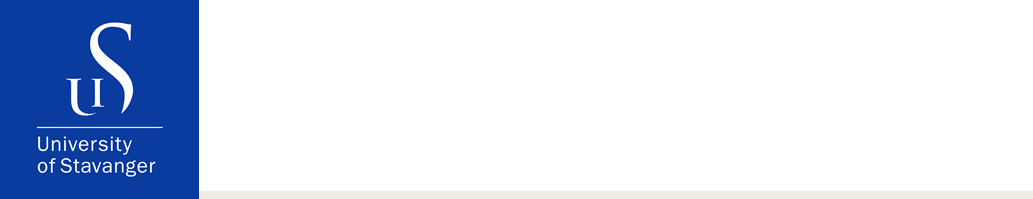
 



# <font color=green>Project 4: Gone (randomly?) Viral | MOD510</font> 



### <u><font color=blue>Project Group</font></u>

- Name: __`Aleksander Storhaug Strøm`__
- StudentNr: __`239655`__


- Name: __`Einar Gramstad Salomonsen`__
- StudentNr: __`245298`__


- Name: __`Eric Severson`__
- StudentNr: __`261873`__

# <u><font color=blue>__Abstract:__</font></u> 

Project 4's (Gone randomly viral) primarily desires to quantify the uncertainty associated with individuals moving randomly throughout a population and the dependencies of certain parameters such as `age`, `quarantine`, `masks,` ect. and how they effect disease propogation amongst a population. By running multiple simulations on a population of 683 individuals over a 2D lattice grid (50x50), we are better able to understand the status of individuals who are __Susceptible, Exposed, 
Infected, Recovered, and Dead__. How these states vary with respect to `time` will help shed light on which parameters contribute the most to reducing the number of infected individuals and delaying the spread of infection to the entire population __(N)__.  

__`Key Results:`__ Major results show that parameters such as __quarantine__, __population density__, and __masks__ held the largest impact on those of the population who became infected. By comparing to Project 3's results - we gained greater insight into utilizing both inputs and outputs of our model vs strictly inputs when using the continuous compartment model as seen in Project 3. Although the results are similar in regards to the trend, an added benefit of the random walk approach is simulating unique scenario(s) we could not apply in the previous project (human interactions). For example, introducing `quarantine` is proven to be a major advantage as it allows for an in-depth analysis into how long an infection can be slowed down. 

The adjustment of parameters such as __r__ (recovery rate) and __d__ (death rate) had a significant impact on our expected trend of realistic population numbers __(Worldmeterinfo [4] )__. We were able to simulate a second, third, and fourth wave propagating throughout all populations. This was critical in respect to understanding the expected time of `x wave` as well its magnitude of infection rate it carried.

`Intro:` The goal of Project 4 was to build a model in which simulated the random movement of individuals over a 2D lattice. Throughout this assignment, more layers will be added to the model however, we begin with only Susceptible & Infected individuals (walkers). Eventually, dead and recovered walkers will be simulated, thus this will build up to our SIRD model. These new layers are crucial to obtain a physical relevance. Several findings will be discussed - For example, how the Susceptible & Infected populations are proportionally evolving in relation to one another as well as how $\beta$ (beta) changes as there are modifications made to the __N__ (population).

`Body:` Our primary take away from this project was how adaptable the __Monte Carlo method__ was on physical problems, and how a virus transmission process is depedent on many variables (for example: Inclusion of recovered & dead). The significance of the intial conditions when infection is introduced to a population does have an impact on the evolution of transmission, for example the amount of time required to infect the whole populace. In order to create more realistic senerios, we added further complexity such as counter-measures such as quarantine, masks and decreasing the population density. 
    
`Conclusion:` In Excercises 1 & 2, the model was demonstrated all __683__ individuals of the population will eventually become infected, simply a matter of time as parameters are adjusted (approximately __350 days / timesteps__). It was also determined that the analytical $\beta$ does not respond correctly with the model, however, the numerical $\beta$ in excercise 3 had a more appropiate effect provided the model in question. The age class was not representabel in terms of the physical world, however, it had an effect on the rate convergence (Increased interaction between healthy and infected). By adding complexity in excercise 4, masks & quarantine were deemed to be effective in terms of slowing down the infection rate, as well as prolonging the virus spread time to the Susceptible population. It was found that the decreased population density extended the virus transmission period for a given period (__12,000 timesteps to reach half infected__). These implementations & the additional compartments enabled us to model several waves of infection. The model did have some disadvantages in that these are respectively in the category of implementing human interaction patterns. For example, city centers, stores, hospitals and modeling human transportion (city-city). These can be accounted for by adding on to our existing layers of our class structure - `random_walk_epidemic()`.

# <u><font color=blue>__Project 4 Introduction:__</font></u> 

#### Major Objectives:

Project 4 seeks to apply a Random Walk model in order to understand the uncertainty of a pandemic propogating through a population. Monte Carlo Simulation will be utilized to better understand the transmission of the disease given the specific interaction between unique individuals in a population. 

The primary outcomes were to apply a random walk on a 2D lattice grid. Within its bounds, individuals with a given population (walkers) will interact with one another. For example, a healthy person who lies on the same coordinate as an infected individual will now be exposed to the disease being modeled - In this case Covid-19. Using a random walk approach and iterating over x number of steps and y number of runs allow for the computation of uncertainty when determining a disease propogation with respect to unique parameters. The impact on parameters such as `quarantine`, `age classification`, `A symptomatic individuals`, `face masks`, `ect` can now be observed. These parameters can then be compared and contrasted against those of the continuous compartment model as seen in Project 3. Lastly, we sought to understand a unique scenario in which quarantine limits the spread of Covid-19 and if this in fact helps to reduce the impact of a `2nd wave` of Covid-19. 

In [1]:
%%HTML
<video width="900" height="500" controls>
  <source src="quarantine_1000.mp4" type="video/mp4">
</video>

### <u><font color=darkblue>Scenerio: No Quarantine & 1,000 people simulated over 1,00 timesteps (Days)</font></u>

- Recovery Rate of individuals: __`0.03`__
- Death Rate of individuals: __`0.00036`__
- immune_period: __`50 timesteps / days`__
- Initially infected: __`10 infected at t=0`__
- Grid size: __`50x50`__

In [16]:
%%HTML
<video width="900" height="500" controls>
  <source src="no_quarantine_1000.mp4" type="video/mp4">
</video>

### <u><font color=darkblue>Scenerio: No Quarantine & 1,000 people simulated over 1,00 timesteps (Days)</font></u>

- Recovery Rate of individuals: __`0.03`__
- Death Rate of individuals: __`0.00036`__
- immune_period: __`50 timesteps / days`__
- Initially infected: __`10 infected at t=0`__
- Grid size: __`50x50`__

In [2]:
%%HTML
<video width="900" height="500" controls>
  <source src="quarantine_1000.mp4" type="video/mp4">
</video>

In [1]:
#Packages import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from scipy.optimize import curve_fit
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,8
from matplotlib import animation, rc
%matplotlib inline
from IPython.display import Image
from IPython.display import Video
from IPython.display import HTML
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning)

# <u><font color=red>__Exercise 1: Implement a random walk disease model__</font></u> 


## Introduction:
The first objective of Excercise 1 was introducing a 2D lattice grid in order to simulate individuals (walkers) over a `nx` by `ny` (50x50) grid where the number of individuals `(N)` was 683. We aimed to simulate only 2 states, that of susceptible and infected individuals. If one healthy walker were to share the same coordinate as an infected walker, there was a certain probability ($q$) that determined if the healthy walked then became infected. For example, if a random number `x` chosen between [0,1] < $q$, a healthy walker became infected. $q$ was input as 0.9 and running the simulation once with 300 steps yielded a plot of both healthy `Susceptible` and sick `Infected` individuals with respect to time (It is being assumed that one step is approximately one day). Creation of a `random_walk_epidemic` class is one of the most integral part of this project. Thus, it is incredly beneficial to utilize all functions in unison along with the their respective attributes under the same class structure.

## Part 1

The ambition for part 1 is to confirm if the created class `random_walk_epidemic` is able to simulate 300 timesteps to be defined as __days__. These walkers should be able to update their respective __STATE__ as there are interaction(s) between the susceptible population & intial infectious walkers. Due to following a randomly chosen direction, the walkers have the opportunity of moving in one of four linear motions: __North, South, East & West__. All directions have a uniform chance of occurence __25%__, and defined restrictions should maintain all motion within the predetermined grid. A seperate plot is then created in order to review the quantity and its uncertainty of the __Susceptible & Infectious__ walkers thoughout the simulation time `n_final`. This plot should be contineously updated as the walkers' __STATE__ updates respectively.
Intial settings are provided of the walkers assuming only the __STATES__, __SUSCEPTIBLE__ & __INFECTEOUS__ are applied. Furthermore, the probability of a __walkers[SUSCEPTIBLE]__ becoming __walkers[INFECTEOUS]__ is given by __q__, which is given to be 90% when both a susceptible walker and an infected individual are located at the same position at the same moment.


In [2]:
class random_walk_epidemic:
    """
    This class structure represents the spread of a disease such as Covid-19 using a 2D lattice grid.
    The relevant numbers for observing the spread are
    stored for 1 and n number of runs (infected, suseptible population(s), etc). 
    Includes several optional model inclusions for 
    creating a more realistic senario as detailed in the parameters below. 
    
    Parameters (init)
    -------------------------
    nx: Cells in x-direction [int]
    ny: Cells in y-direction [int]
    N: Population size [int]
    I0: Intial Infection [int]
    q: The infection rate [float]
    quranatine: Activation statement quarantine walls [True or False]
    grid_interval: Grid interval [int]
    infect_tol: Tolerance of infection before quarantine is activated [float]
    infect_tol_m: Tolerance of infection before masks are used [float]
    age: Activation statement age class [True or False]
    age_ratio: Division of age class [float]
    activation_beta: Activation statement numerical beta [True or False]
    ana_beta: Activation statement analytical beta [True or False]
    mask: Activation statement to use mask [True or False]
    rec: Activation statement to allow walkers to recover [True or False]
    dead: Activation statement to allow walkers to die [True or False]
    death_rate: The death rate [float]
    immune_period: Immune period, how long walkers stay recovered, after this period they become infected [int]
    show_median: Activation statement for numerical Beta 2 [True or False]    
    """
    def __init__(self, nx, ny, N, I0, q, quarantine = False, 
                 grid_interval = 10, infect_tol = 0.1, infect_tol_m = 0.1, age = False, 
                 age_ratio=0.5,activation_beta=False,ana_beta=False ,
                 mask=False, rec =False, dead= False,r=0.01 , death_rate=0.01,
                immune_period = 200, show_median=False):
        
        # defining variables
        self.nx = nx
        self.ny = ny
        self.N = N
        self.I0 = I0
        self.mask = mask
        self.q = q
        self.q0 = q
        self.infect_tol_m = infect_tol_m
        self.S0 = self.N-self.I0
        self.age = age
        self.infect_tol = infect_tol
        self.age_ratio = age_ratio
        self.act_beta = activation_beta
        self.quarantine = quarantine
        self.act_ana_beta = ana_beta
        self.death_rate = death_rate
        self.rec = rec
        self.dead = dead
        self.r = r
        self.immune_period = immune_period
        self.show_median=show_median
        
        
        # initialising the model:
        self.SUSCEPTIBLE = 10 
        self.INFECTIOUS = 1 
        self.RECOVERED = 2 
        self.DEAD = 3 
        
        self.State = np.full(self.N, self.SUSCEPTIBLE) 
        self.State[0:self.I0] = self.INFECTIOUS
        self.days_recovered = np.full(self.N, 0)
        if self.age == True:
            self.Age_class = np.full(self.N, 0)
            self.Age_class[round(self.N*self.age_ratio):] = 1
        else:
            pass

        self.Walkers = np.random.randint(0,[self.nx+1, self.ny+1], size=(self.N, 2))
        self.Walkers_ini = np.copy(self.Walkers)
        self.Walkers_old = np.copy(self.Walkers)
        
        # the quarantine, walls etc
        if quarantine == True:
            # vertical
            openingx = np.arange(round(grid_interval/2), self.ny, grid_interval)
            openingy = np.arange(round(grid_interval/2), self.nx, grid_interval)
            
            wallx = np.arange(0, self.nx+1, 1)
            wally = np.arange(0, self.ny+1, 1)
            
            placex = np.arange(0,self.nx, grid_interval)
            placex = np.delete(placex, 0)
            placey = np.arange(0,self.ny, grid_interval)
            placey = np.delete(placey, 0)
            
            for i in openingy:
                wallx = wallx[wallx != i]
            for i in openingx:
                wally = wally[wally != i] 
            self.wall = np.array([[0,0]])
            for i in placex:
                temp = np.stack((np.full(len(wally),i),wally),axis = -1)
                self.wall = np.concatenate((self.wall,temp))
            for i in placey:
                temp = np.stack((wallx, np.full(len(wallx),i)),axis = -1)
                self.wall = np.concatenate((self.wall,temp))       
            ############################################################################
            
            
            self.wall_state = np.full(len(self.wall), 0)
        else:
            self.wall_state = 0
        
        
        # keeping count of the numbers
        self.I = I0
        self.S = self.S0
        self.R = 0
        self.D = 0
        self.S_old  = self.S
        
        self.beta_1 = 0
        self.beta_2 = 0
        self.beta1 = self.beta_1
        self.beta2 = self.beta_2
        
        
        self.S_list = [self.S0]
        self.I_list = [self.I0]
        self.R_list = [self.R]
        self.D_list = [self.D]
        self.beta1_list = [self.beta_1]
        self.beta2_list = [self.beta_2]
        self.z_step = len(self.beta1_list)-1
        if self.age == True:
            self.young_I = [I0]
            self.old_I = [0]
        else:
            pass
        
        # saving the statistics
        self.stats_beta1_list =[]
        self.stats_beta2_list = []
        self.stats_I = []
        self.stats_S = []
        self.stats_R = []
        self.stats_D = []
        if self.age == True:
            self.stats_I_old = []
            self.stats_I_young = []
        else:
            pass
                
    
    def Illegal_move(self):
        """
        Controlls the restriction of movement for the walkers.
        This regards the limit given by nx and ny.
        Also considers quarantine barriers if enabled.
        
        Returns
        ----------------------------------------
        The indexes of the walkers that have moved to an
        illegal position.
        """
        #General grid boundaries
        
        illegal = np.logical_or(self.Walkers[:,0]>self.nx, self.Walkers[:,0]<0)
        illegal_ = np.where(illegal == True)[0] # returns the idexes of "true" meaning illegal
        illegal = np.logical_or(self.Walkers[:,1]>self.ny, self.Walkers[:,1]<0)
        illegal_ = np.append(illegal_, np.where(illegal == True)[0])
        
        #Quarantine wall
        
        if self.quarantine == True:
            if 1 in self.wall_state:
                overlap = (self.Walkers[:, None] == self.wall).all(-1).any(-1)
                # index of this overlap
                over_idx = np.where(np.array(overlap)==True)[0]
                illegal_ = np.append(illegal_, over_idx)
            else:
                pass
        else:
            pass
        
        return illegal_
    
    def infection_rules(self):
        """
        Controlls the mechanics of the infection process.
        Will update the state of walkers[SUSCEPTIBLE] to walkers[INFECTIOUS], this is done by the randomly generated
        variable of rand_float if less than the infection rate q
        """
       
        S_loc=self.Walkers[self.State==self.SUSCEPTIBLE]
        I_loc=self.Walkers[self.State ==self.INFECTIOUS]
        #  find overlap in I_loc
        overlap = (self.Walkers[:, None] == I_loc).all(-1).any(-1)
            
        # index of this overlap
        over_idx = np.where(self.State*overlap==self.SUSCEPTIBLE)[0]
        #random number
        rand_float = np.random.uniform(size = len(self.State[over_idx]))
        turn = np.flatnonzero(rand_float<self.q)
        turn = over_idx[turn]
        # infect
        self.State[turn] = self.INFECTIOUS
        
    
        self.S = sum(self.State == self.SUSCEPTIBLE)
        self.I = sum(self.State == self.INFECTIOUS)
        
    def Recover_rules(self):
        """
        Controlls the attributes of the recovered conditions
        Updates the walkers[self.INFECTIOUS] to walkers[self.RECOVERED] if randomly generated number _recover_ 
        becomes less than self.r.
        Also controlles walkers[self.RECOVERED] to walkers[SUSCEPTIBLE], when self.days_recovered exceeds 
        self.immune_period.
        This function also updates the days_recovered.
        """
        #finding infected people that can recover
        over_indx = np.where(self.State == self.INFECTIOUS)[0]
        
        #random number
        rand_float = np.random.exponential(size = sum(self.State[over_indx] == self.INFECTIOUS))
        recover = np.flatnonzero(rand_float<self.r)
        """
        HISTOGRAM COMPARISON, POINT TO TALK ABOUT
        """
        
        
        recover = over_indx[recover]
        #recover
        self.State[recover] = self.RECOVERED
        
        # immunity (recovered implies immune) makes suseptible
        past_im = np.where(self.days_recovered>self.immune_period)[0]
        self.State[past_im] = self.SUSCEPTIBLE
        self.days_recovered[past_im] = 0
        
        #calculate
        self.S = sum(self.State == self.SUSCEPTIBLE)
        self.I = sum(self.State == self.INFECTIOUS)
        self.R = sum(self.State == self.RECOVERED)
        indx = np.where(self.State == self.RECOVERED)[0]
        self.days_recovered[indx] = self.days_recovered[indx]+1
        
        
        
    
    def Death_rules(self):
        """
        Controlles dead walkers.
        Will by chance change walker[self.INFECTIOUS] to walkers[self.DEAD] if the randomly generated number
        rand_float is less than death_rate.
        """
        # fining infected that can then die
        over_indx2 = np.where(self.State == self.INFECTIOUS)[0]
        #random number
        rand_float = np.random.exponential(size = sum(self.State == self.INFECTIOUS))
        death = np.flatnonzero(rand_float<self.death_rate)
        death = over_indx2[death]
        # death
        self.State[death] = self.DEAD
        
        self.I = sum(self.State == self.INFECTIOUS)
        self.D = sum(self.State == self.DEAD)

    
        
    def forward_move(self):
        """
        Moves the model forward by one step, this involves utilising random walk to move
        the walkers, activate anti virus methods if enabled, changing the state of the walkers
        using the relevant class functions. And finally calculating and/or storing relevant numbers 
        such as beta and storing the walker states at this time. 
        """
        if self.age == True:
            
            #Young people move 
            
            draws = np.random.randint(0, 4, 
                                      size=np.count_nonzero(self.Age_class == 0))
            direction = lambda x: np.array([0, 1]) if x == 0 else ( np.array([1, 0]) if x == 1 else ( np.array([0, -1]) if x == 2 else np.array([-1, 0]) ))
    
                
            v_direction = np.vectorize(direction, signature='()->(n)')
            next_pos = v_direction(draws)
            
            self.Walkers[0:round(self.N*self.age_ratio)] += next_pos
            
            
            #Old people move
            
            draws = np.random.randint(0, 5, 
                                      size=sum(self.Age_class))
            direction = lambda x: np.array([0, 1]) if x == 0 else ( np.array([1, 0]) if x == 1 else ( np.array([0, -1])if x == 2 else (np.array([-1, 0]) if x == 3 else np.array([0, 0]))))
    
                
            v_direction = np.vectorize(direction, signature='()->(n)')
            next_pos = v_direction(draws)
            self.Walkers[round(self.N*self.age_ratio):] += next_pos
            
        else: #Every walker is considered an young walker    
            draws = np.random.randint(0, 4, 
                                      size=self.N)
            direction = lambda x: np.array([0, 1]) if x == 0 else ( np.array([1, 0]) if x == 1 else ( np.array([0, -1]) if x == 2 else np.array([-1, 0]) ))
    
                
            v_direction = np.vectorize(direction, signature='()->(n)')
            next_pos = v_direction(draws)
            
            self.Walkers += next_pos
        
                                  
        
        #change quarantine state
        if self.quarantine == True:
            if self.I/(self.S+self.R) >= self.infect_tol:
                self.wall_state[:] = 1
            else:
                self.wall_state[:] = 0
        else:
            pass
         # masks
        if self.mask == True:
            if self.I/(self.S+self.R) >= self.infect_tol_m:
                self.q = 0.9*0.5
            else:
                self.q = self.q0
        else:
            pass
        
        #check illegal moves
        Illegal_move = self.Illegal_move()
        #reset illegal moves (in quarantine people might get stuck)
        self.Walkers[Illegal_move] = self.Walkers_old[Illegal_move]

        # updating the state of all teh walkers
        self.infection_rules()
        if self.rec == True:
            self.Recover_rules()
        else:
            pass
        if self.dead == True:
            self.Death_rules()
        else:
            pass
        
        # saving numbers for this time step
        self.I_list.append(self.I)
        self.S_list.append(self.S)
        self.R_list.append(self.R)
        self.D_list.append(self.D)
        
        self.Walkers_old = np.copy(self.Walkers)
        
        #Beta 1 & 2 estimation
        
        self.S_old = self.S_list[-2]
        self.R_old = self.R_list[-2]
        p=self.S+self.R
        p_old = self.S_old+self.R_old
        non_zero_beta2 = 0.1
        new_beta1 = np.log((self.S0*self.I)/((self.I0*(self.N-self.I)))) / (self.z_step)
    
        if (self.S - self.S_old) == 0.0:
            new_beta2 = non_zero_beta2
        else:
            new_beta2 = -1*((p - p_old)*(self.N-self.D))/(p*self.I)
            non_zero_beta2 = np.copy(new_beta2)
       
        self.S_old = np.copy(self.S)
        self.beta1_list.append(new_beta1)
        self.beta2_list.append(new_beta2)
        self.z_step += 1
        
        
        #Count amount of you and old people
        
        if self.age == True:
            # young
            young_In = np.count_nonzero(self.State[0:round(self.N*self.age_ratio)] ==1)
            self.young_I.append(young_In)
            
            # old
            old_In = np.count_nonzero(self.State[round(self.N*self.age_ratio):]==1)
            self.old_I.append(old_In)
        else:
            pass
        
    def plot_numbers(self):
        """
        Plotting the STATE of the walkers, and plots the amount of different walker states in an seperate plot
        A plot showing the count of these states(Susceptible,Infected,Recovered & Dead) & Analytical beta + numerical beta
        A seperate plot showing the walkers random walk map. 
        """
        fig, (ax1, ax3)  = plt.subplots(1, 2, figsize=(20, 10))
        
        ax1.plot(self.I_list, label = 'Number of Infected', linewidth=3)
        ax1.plot(self.S_list, label = 'Number of Suseptible', linewidth=3)
        if self.rec ==True:
            ax1.plot(self.R_list, label = 'Number of Recovered', linewidth = 3)
        else:
            pass
        if self.dead == True:
            ax1.plot(self.D_list, label = 'Number of Dead', linewidth = 3)
        else:
            pass
            
        ax1.set_title('Population Numbers: '+str(self.S )+ ' Susceptible  & '+str(self.I)+' Infected', fontsize=22)
        ax1.set_ylabel('Population Number', fontsize=16)
        ax1.set_xlabel('Days since Outbreak (timesteps)', fontsize=16)
        ax1.grid()
        ax1.legend(loc='best', fontsize=16, borderpad=0)
        
        if self.act_beta == True:
            ax2 = ax1.twinx()
            #ax2.plot(self.beta1_list, '--', label = 'Beta 1', color = 'black', linewidth=3)
            ax2.plot(self.beta2_list, label = 'Beta 2', color = 'red', linewidth=3)
            ax2.set_ylabel('Infection Rate Beta', fontsize=16)
            ax1.set_xlabel('Days since outbreak', fontsize=16)
            ax2.legend(loc='best', fontsize=16, borderpad=0)
            ax2.grid()   
        else:
            pass
        if self.act_ana_beta == True:
            ax2 = ax1.twinx()
            ax2.plot(self.beta1_list, '--', label = 'Beta 1', color = 'black', linewidth=3)
            ax2.set_ylabel('Infection Rate: Beta', fontsize=16.8)
            ax2.set_xlabel('Days since outbreak', fontsize=16)
            ax2.legend(loc='best', fontsize=16, borderpad=0)
            ax2.grid()   
            
        S_loc=self.Walkers[self.State==self.SUSCEPTIBLE]
        I_loc=self.Walkers[self.State ==self.INFECTIOUS]
        R_loc=self.Walkers[self.State ==self.RECOVERED]
        ax3.grid()
        ax3.set_title('2D Lattice Grid  '+ 'at TIMESTEP: '+str(self.z_step), fontsize=22)
        #ax1.set_title('Population Numbers: '+str(self.S )+ ' Susceptible  & '+str(self.I)+' Infected', fontsize=22)
        ax3.set_xlim(-2,self.nx+2)
        ax3.set_ylim(-2,self.ny+2)
        ax3.scatter(S_loc[:,0],S_loc[:,1],c='b', label = 'Susceptible')
        ax3.scatter(I_loc[:,0],I_loc[:,1],c='r',s=80, label = 'Infectieous')
        ax3.scatter(R_loc[:,0],R_loc[:,1],c='g',s=80, label = 'Recovered')
        ax3.hlines(y=self.ny,  xmin=0, xmax=self.nx, color='black')
        ax3.hlines(y=0, xmin=0, xmax=self.nx, color='black')
        ax3.vlines(x=0, ymin=0, ymax=self.ny, color='black')
        ax3.vlines(x=self.nx, ymin=0, ymax=self.ny, color='black')
        
        if self.quarantine == True:
            if 1 in self.wall_state:
                ax3.scatter(self.wall[:,0],self.wall[:,1], c = 'turquoise', label = 'Quanrantine Barriers')
            else:
                pass
        else:
            pass
        
        
        ax3.legend(loc='best', fontsize=16, borderpad=0)
        plt.show()
      
    def simulation_run(self, n_final, pl=True, plot_freq=150):
        """
        Simulates the evolution of the walkers & the numbers associated with the walkers population.
        Will be repeatedly iterated through forward_move() function to move the model forward in time,
        one may choose to display plots and their frequancy aswell.
        
        Parameters
        --------------------------------------
        n_final: Amount of steps [int]
        pl: Activation of plot_numbers() [True or False statement]
        plot_freq: How many timesteps that are taken before plotting is done [int]
        
        Returns
        --------------------------------------
        Data gathered on each timestep. [lists]
        """
        n = 1
        self.z_step += 1
        
        while n<= n_final:
            self.forward_move()
            if pl == True:
                if self.z_step % plot_freq == 0:
                   
                    self.plot_numbers()

                else:
                    pass
            else:
                pass
            n += 1
            
        return self.I_list, self.S_list, self.R_list , self.D_list, self.beta_1, self.beta_2

    
    def reset_model(self):
        """
        Storing of variables & lists from this current run. 
        Then a complete reset of the variables stored in the class 
        to make the model ready for a new run.
        """
        # storing
        self.stats_I.append(self.I_list)
        self.stats_S.append(self.S_list)
        self.stats_beta1_list.append(self.beta1_list)
        self.stats_beta2_list.append(self.beta2_list)
        self.stats_R.append(self.R_list)
        self.stats_D.append(self.D_list)
        
        if self.age == True:
            self.stats_I_old.append(self.young_I)
            self.stats_I_young.append(self.old_I)
        else:
            pass
        
        #Reset walkers position numbers of infected & susceptible
        self.I = self.I0
        self.S = self.S0
        self.R = 0
        self.D = 0
        
        self.days_recovered = np.full(self.N, 0)
        self.State[:] = self.SUSCEPTIBLE
        self.State[0:self.I0] = self.INFECTIOUS
        self.Walkers = self.Walkers_ini
        self.S_list = [self.S0]
        self.I_list = [self.I0]
        self.R_list = [self.R]
        self.D_list = [self.D]
        
        
        #Beta analytical & numerical Reset
        if self.act_ana_beta == True:
            self.beta1 = 0
            self.beta1_list = [self.beta1]
        else:
            pass
        
        if self.act_beta == True:
            #self.beta1 = 0
            self.beta2 = 0
            #self.beta1_list = [self.beta1]
            self.beta2_list = [self.beta2]
            #self.beta2_list = [0.0]
            self.z_step = len(self.beta1_list)-1  ### must have z_step reset last 
            self.S = self.S0
            self.S_old  = self.S
        else:
            pass
        
        if self.age == True:
            self.young_I = [self.I0]
            self.old_I = [0]
        else:
            pass
            
        
    def stats(self, n_final, n_runs, pl, plot_freq = 150):
        """
        Running the simmulation run a specified number of times for a specified lengt of timesteps.
        This function uses the data stored each run to provide the model trends as a plot and a dataframe.
        Parameters
        ---------------------------
        n_final: Amount of steps [int]        
        n_runs: Amount of runs [int]
        pl: Activation of plot_numbers() [True or False statement]
        plot_freq: How many timesteps that are taken before plotting is done [int]
        
        Returns
        ---------------------------
        A Combined dataframe of means,standard deviations of infected & susceptibles and mean and median of beta results.
        Stored for later use, and visualization of all these values in the same plot.
        """
        stats_I=[]
        stats_S=[]
        stats_R=[]
        stats_D=[]
        m=1
        
        while m<=n_runs:
            self.simulation_run(n_final, pl, plot_freq)
            print(m)
            
            self.reset_model()
            m+=1
        
        stats_I=np.array(self.stats_I)
        stats_S=np.array(self.stats_S)
        
        if self.rec == True:
            stats_R = np.array(self.stats_R)
            mean_R = np.mean(stats_R, axis=0)
            std_R = np.std(stats_R, axis = 0)
            
        else:
            pass
        if self.dead == True:
            stats_D = np.array(self.stats_D)
            mean_D = np.mean(stats_D, axis=0)
            std_D = np.std(stats_D, axis = 0)
        
        mean_I=np.mean(stats_I, axis = 0)
        mean_S=np.mean(stats_S, axis = 0)
        std_I=np.std(stats_I, axis = 0)
        std_S=np.std(stats_S, axis = 0)
        
        if self.act_ana_beta ==True:
            stats_beta1_list=np.array(self.stats_beta1_list)
            mean_beta1 = np.mean(stats_beta1_list, axis=0)
        else:
            pass
        
        if self.act_beta == True:
            stats_beta2_list=np.array(self.stats_beta2_list)
            mean_beta2 = np.mean(stats_beta2_list, axis = 0)
            median_beta2 = np.median(stats_beta2_list, axis = 0)
        else:
            pass
          
        stats=pd.DataFrame(data=np.array([mean_I,std_I,mean_S,std_I]).T,
                                        columns=['Mean Infected','Standard Deviation Infected',
                                                'Mean Susceptible', 'Standard Deviation Susceptible'])
        if self.act_beta==True:
            stats['Mean Beta 2']=np.array([mean_beta2]).T
            stats['Median Beta 2'] = np.array([median_beta2]).T
            
        else:
            pass
        
        if self.act_ana_beta == True:
            stats['Mean Beta 1'] = np.array([mean_beta1]).T
            
        else:
            pass
        
        if self.rec == True:
            stats['Mean Recovered'] = np.array([mean_R]).T
            stats['Standard Deviation Recovered'] = np.array([std_R]).T
            
        else:
            pass
        
        if self.dead == True:
            stats['Mean Dead'] = np.array([mean_D]).T
            stats['Standard Deviation Dead'] = np.array([std_D]).T
            
        else: 
            pass
            
        fig, ax1 = plt.subplots(figsize=(16.8,12.8))
        
        ax1.plot(stats['Mean Infected'],ls = '-', label = 'Number of Infected')
        ax1.plot(stats['Mean Susceptible'],ls = '-', label = 'Number of suseptible')
        
        ax1.plot(stats['Mean Infected']+stats['Standard Deviation Infected'], 
                 label = '+ std Infected', ls = '--')
        ax1.plot(stats['Mean Infected']-stats['Standard Deviation Infected'], 
                 label = '- std Infected', ls ='--')
        ax1.plot(stats['Mean Susceptible']+stats['Standard Deviation Susceptible'], 
                 label = '+ std Susceptible',ls = '--')
        ax1.plot(stats['Mean Susceptible']-stats['Standard Deviation Susceptible'], 
                 label = '- std Susceptible',ls = '--')
        ax1.fill_between(np.arange(0, len(stats)), 
                         stats['Mean Infected']+stats['Standard Deviation Infected'],
                         stats['Mean Infected']-stats['Standard Deviation Infected'], alpha=0.1)
        ax1.fill_between(np.arange(0, len(stats)), 
                         stats['Mean Susceptible']+stats['Standard Deviation Susceptible'],
                         stats['Mean Susceptible']-stats['Standard Deviation Susceptible'], alpha=0.1)
        
        if self.rec == True:
            ax1.plot(stats['Mean Recovered'],ls = '-', label = 'Number of Recovered')
            
            ax1.plot(stats['Mean Recovered']-stats['Standard Deviation Recovered'],
                     ls = '--', label = '- std Recovered')
            ax1.plot(stats['Mean Recovered']+stats['Standard Deviation Recovered'],
                     ls = '--', label = '+ std Recovered')
            ax1.fill_between(np.arange(0, len(stats)), 
                             stats['Mean Recovered']+stats['Standard Deviation Recovered'],
                             stats['Mean Recovered']-stats['Standard Deviation Recovered'], alpha=0.1)
        else:
            pass
        
        if self.dead == True:
            ax1.plot(stats['Mean Dead'],ls = '-', label = 'Number of Dead')
            ax1.plot(stats['Mean Dead']-stats['Standard Deviation Dead'],
                     ls = '--', label = '- std Dead')
            ax1.plot(stats['Mean Dead']+stats['Standard Deviation Dead'],
                    ls = '--', label = '+ std Dead')
            ax1.fill_between(np.arange(0, len(stats)), 
                            stats['Mean Dead']+stats['Standard Deviation Dead'],
                            stats['Mean Dead']-stats['Standard Deviation Dead'], alpha=0.1)
        else:
            pass
        ax2 = ax1.twinx()
        if self.act_beta == True:
            ax2.plot(stats['Mean Beta 2'], color='cyan', label = 'Mean Beta2')
            if self.show_median == True:
                ax2.plot(stats['Median Beta 2'], color='yellow',ls='--', label = 'Median Beta2')
            else:
                pass
            ax2.legend(loc='best', fontsize=16, borderpad=0)
        if self.act_ana_beta == True:
            ax2.plot(stats['Mean Beta 1'], color='Turquoise', label = 'Mean Beta 1')
            ax2.legend(loc='best', fontsize=16, borderpad=0)
        else:
            pass
        
        ax1.set_ylabel('Amount of people', fontsize=16) 
        plt.title("The Evolution of infected vs susceptible")    
        plt.xlabel('Days since outbreak')
        ax1.set_ylabel('Amount of people')
        ax1.legend(loc='best', fontsize=16, borderpad=0)
        plt.grid()
        plt.title('Statistics with '+str(n_runs)+ ' run(s) & '+str(n_final)+' steps per run', fontsize=22)
        plt.show()

        return stats  

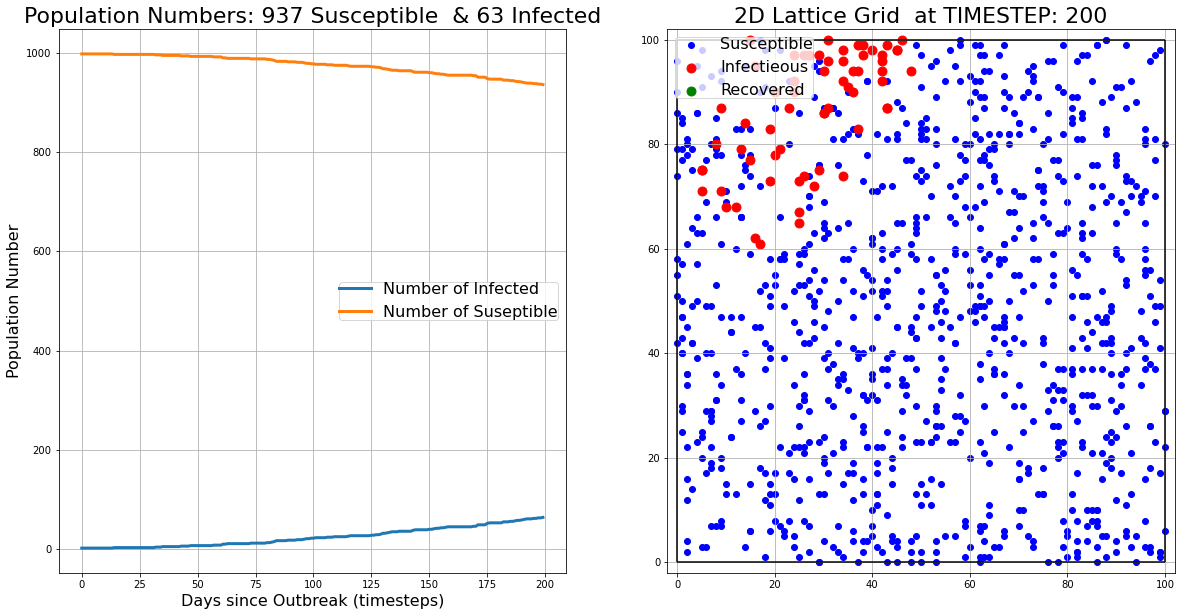

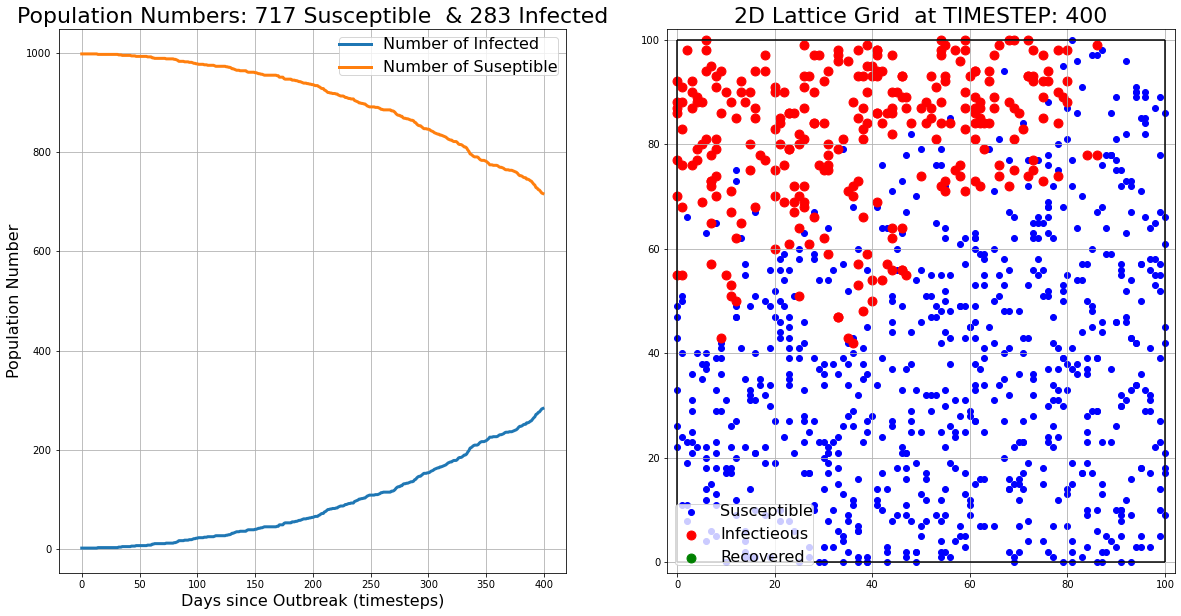

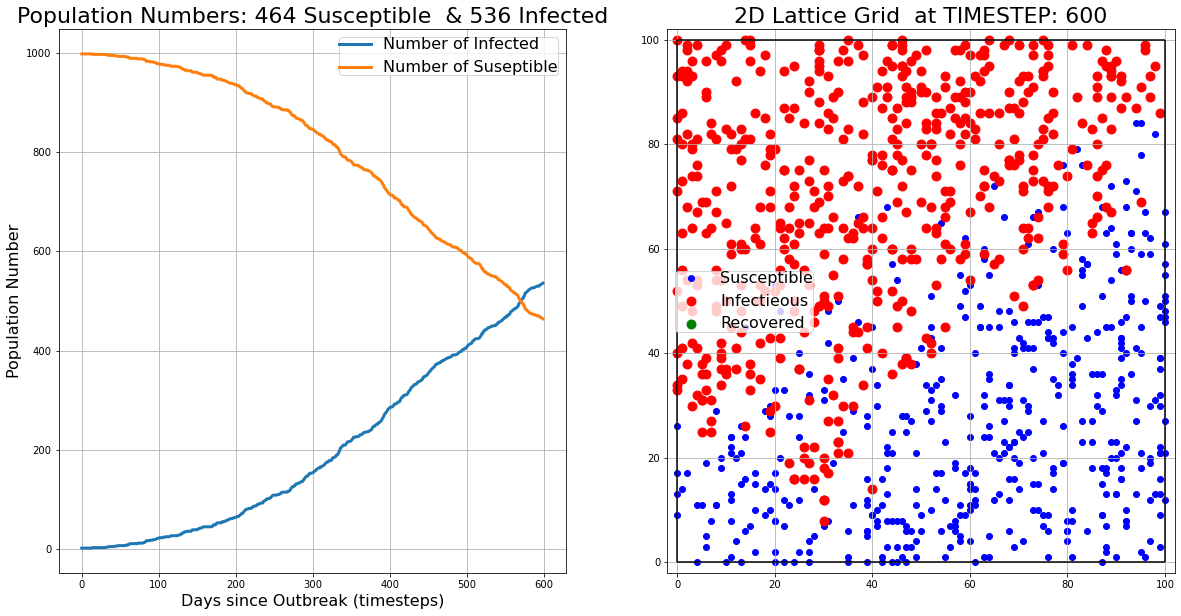

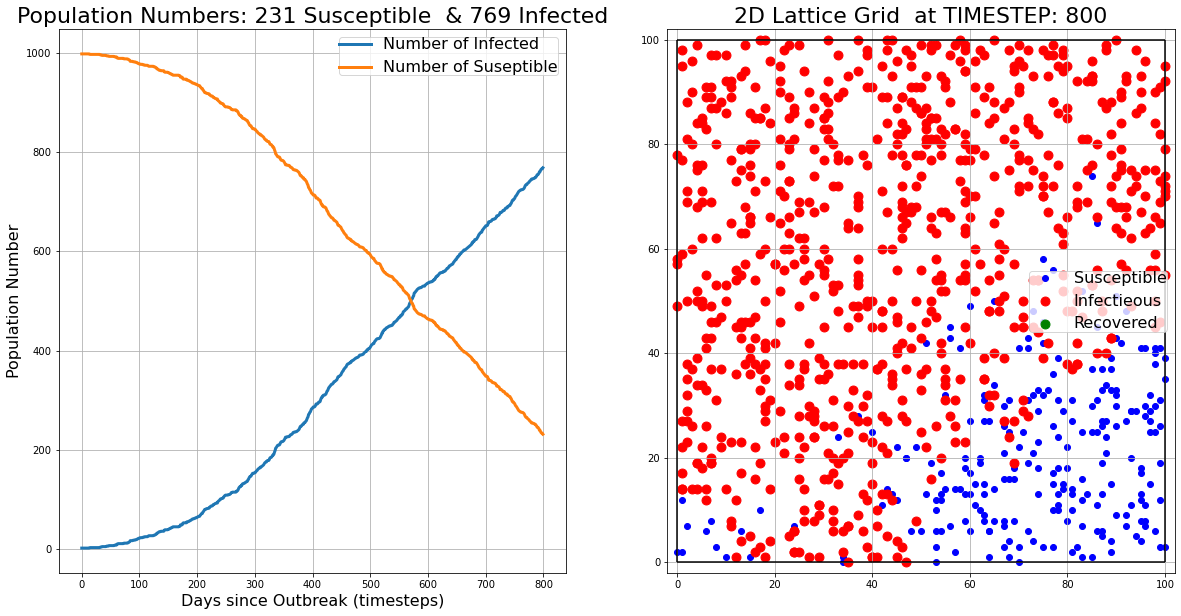

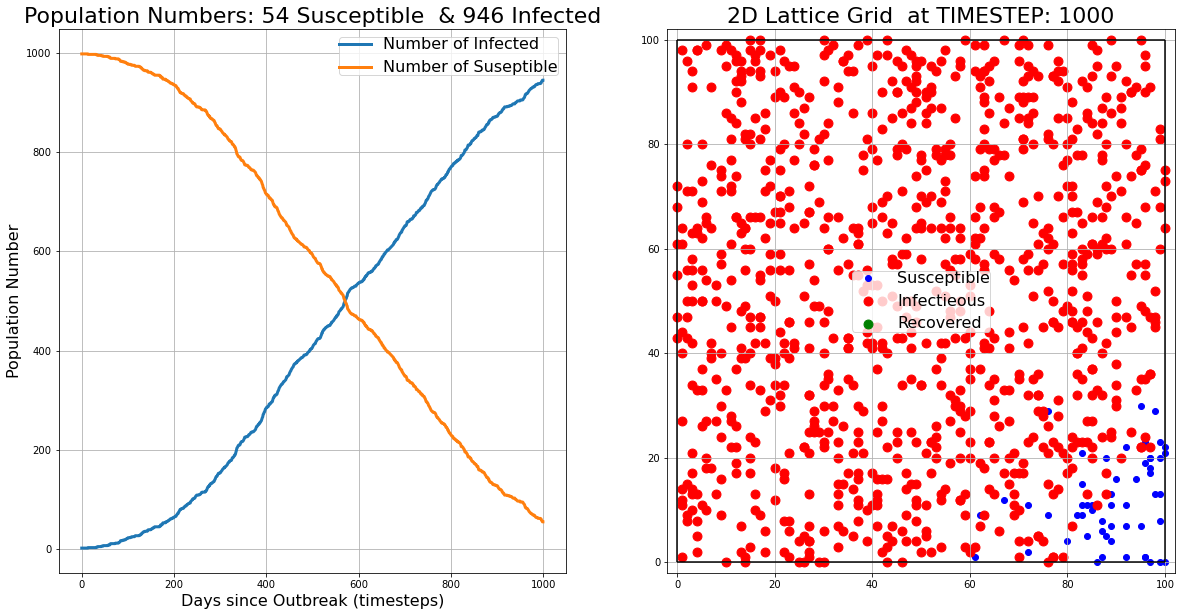

In [3]:
model = random_walk_epidemic(100, 100, 1000, 1, 0.9)

stats = model.simulation_run(1000, True, plot_freq = 200)

In [ ]:
%whos # Displays the variable type plus some extra info: size, contents,

In [ ]:
%who_ls #only displays the variables name

### Comments:
The implemention of one single infected indiviual is deemed to be successful. We developed a function which implemented a seemless approach to reducing the simulation memory and compututational requirements. This is carried out via `plot_freq`. Analyzing the plots above, there is little increase in the infected population before __25 days__, however, past this date the amount of infected individuals doubles approximately every __50th days__. When observering different points in time, the infected walkers are iteracting with susceptibles that in most cases will transmit the virus to the susceptible walker. When the virus is "transmited", the previous susceptible walker will be updated to an infected walker, by changing the `STATE` of the walker. Implementing our coding structure in the class `random_walk_epidemic` the moving motion of the walkers is succesful in completely being bound to choose __N, E, W or S__ directions, which prohibits diagonal motions. These motions resulted in a problematic mixing scenario where the point of initial infection would not necessarily spread to the closest neighbors as expected. In this run there are no "surviving" susceptible walkers. From the beginning, the total amount of infected & susceptible individuals by `300 timesteps`, it can be seen that the inevitable is going to occur. This is that of the population of infected walkers will eventually overtake the susceptible population as the majority of the populace. Both of these populations react inversely proportionally. For example, if the amount of infected rises, the same amount of susceptible individuals will decrease proportionally. 


### Reflection:

This estimate seems to be sensible, but it is hard to grasp that the everyone is going to become infected, could this be the case if government authorities did not activate particular counter-measures against this spread? Some difficulties encountered when establishing the above class are when new elements are to be added within the `random_walk_epidemic` class and rearranging the previous setup and retreiving new variables & functions to be suitable with the class. It is important to mention that it was key to implement he respective `state` of an infected or susceptible individual without utilizing a __for loop__ - Particularly the tasks of `movement` and `overlapping coordinates`. Albeit this may have been the most straight-forward approach with a __for loop__, it is not ideal due to the fact there are many elements that are tabulated and appended in created lists and multiple resets of these lists. This was eventually achieved, as it paid dividends in regards to saved simulation time and further complexity / assumptions.

# <u><font color=red>__Exercise 2: Comparison with deterministic SI-model__</font></u> 
Assumptions: nx=ny=50, q=0.9 N=682. Suppose there is 1 singular infected to start with.



## Introduction Excercise 2:

The major objective of __Excercise 2__ is to retrieve plots for the development of the infected and susceptible populace. The data used in plotting should be stored with the assumption it will be required for extraction at a later point. To obtain a believeable distribution of the cases, the simulation must display a period of atleast 300 days, aswell as testing these 300 days a further 100 times over in order to to satisfy a physical relation to the randomly generated walkers interacting amongst one another. After 1 simulation is performed, variables are reset and the data over the run is stored in order to begin a new simulation run, and in the long-term take the expected sample mean and the standard deviation $\sigma$. Both are calculated for both infected and susceptible throughout this excercise. It could perhaps be useful to keep track of how much the result varies from the mean, thus exploration on how the intial condition of a random walk model can affect the progression of the walkers, both positively & negatively is recommended. As mentioned, only two compartments of - That of the __S__ Susceptible & __I__ Infected are considered at this stage of our random walk model. The infection rate beta $\beta$ will be analytically displayed in an effort to gain insight on how $\beta$ varies as the population compartment changes. 


### Part 1:

In part 1, exploration of the 2 compartment model based on the random walk is conducted. To gain insight on the progression of the virus transmission based on random events, it is required to iterate over the same time interval  `n_final` (300 days) for 100 runs `n_runs`. When the same amount of timesteps are repeatedly run 100 times, it is necessary to establish an average of these different randomly evolving simulation runs to establish a distribution  of these events. To store the variation between multiple simulation runs, an estimation of the standard deviation there is in the sampled ploted walkers[STATES], the estimation of the standard deviation is useful in visualizing how much the amount of susceptible & infecteous individuals are due to random movements. Visualization of these statistics for each run can prove useful when determining the dependance on input and output parameters. These parameters may then hopefully shed light on the correct countermeasures applicable for certain situation/conditions. In Exercise 4, these parameters will be analyzed in closer detail. 





1
2
3
4
5
6
7
8
9
10
11
12


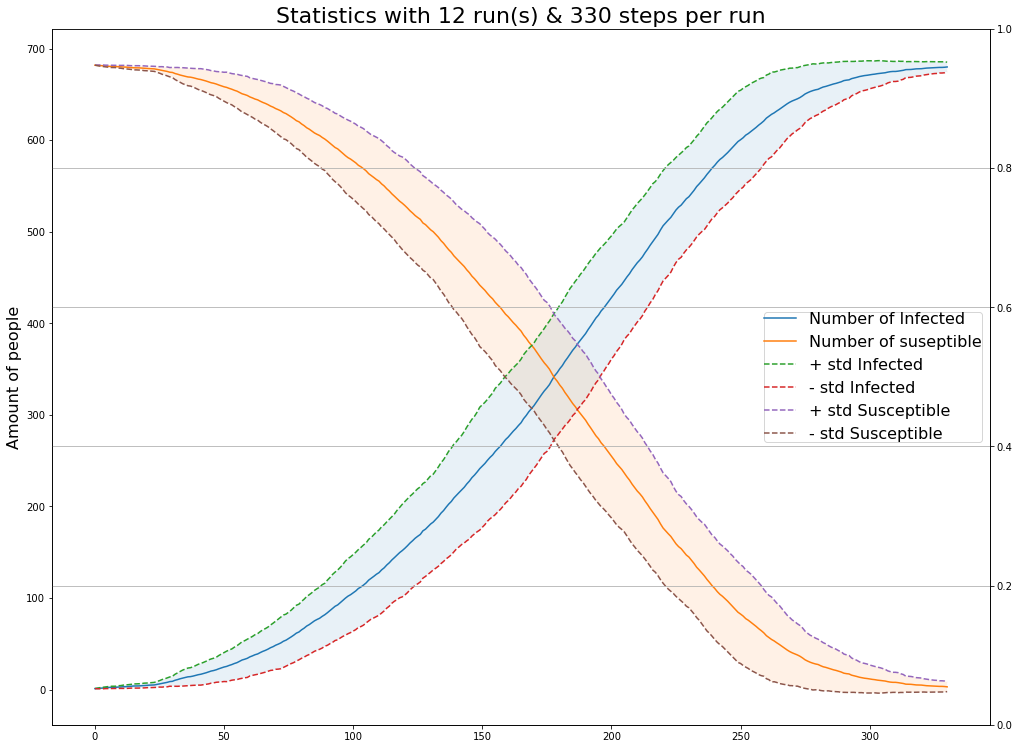

In [8]:
model_1 = random_walk_epidemic(50, 50, 683, 1, 0.9)
stats_1_initial = model_1.stats(330,12, pl=False)


### Comment(s) part 1

As stated in the intial settings, 1 individual is to be infected at `timestep = 0`. Upon which after his or her introduction to the population, it seems to not significantly effect the amount of susceptible walkers before __25 days__ (assuming `1 timestep` = 1 day) since the start of outbreak. After this point, the growth of the infected populace is growing exponentially. When approaching __350 days__, both the susceptible population are converging at zero, and the infected population will converge at the max amount (original number of N). The largest standard deviation interval has the ability to shift the time of occurences by __45 days__, which is a significant change in either direction. This indicates there is a steep variation when only one individual is intially infected. The elapsed time it takes the infected population to overthrow the susceptible population is approximately __165 days__ after the initial outbreak. It appears that 1 intially infected individual is not efficent enough to considerably spread the virus in its intial stages. Onthe other hand, it has infected some susceptible walkers as we can observe the rise of __INFECTEOUS__ is quite dramatic.



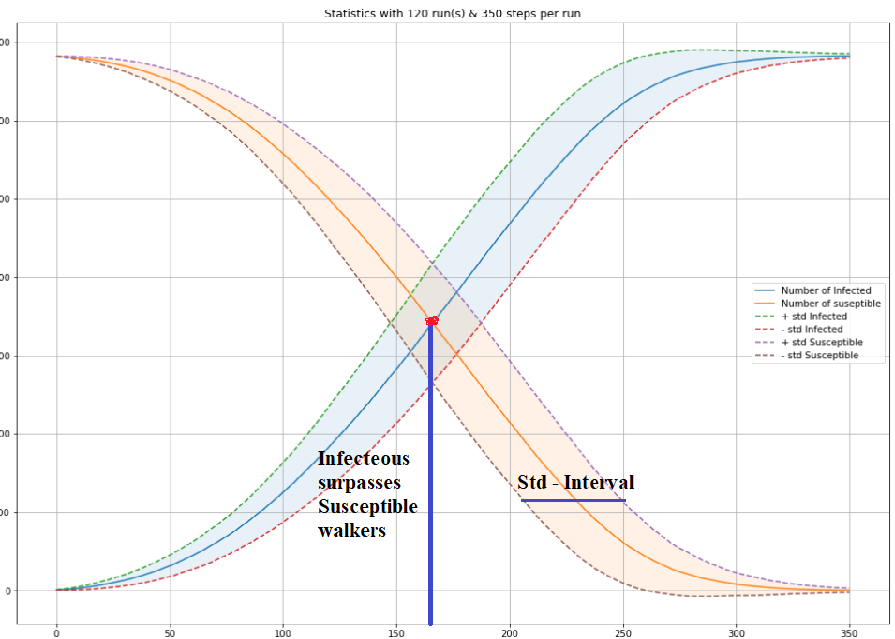

Figure 1: Visualization the center of intersection and standard deviation interval.
### Reflection part 1

In order develop a function to store statistical data such as the standard deviation of the populate at respective `timestep(s)`, `mean`, and `median`. The __stats__ function uses the __simulation_run__ `n` number of times over the time interval to gain the necessary statistics. The statistics for each run are stored by using __reset_model__, and finally output from __simulation_run__ to create a pandas DataFrame and plots of the statistical data in __stats__. The efficiency of the code allows for a large number of runs within a reasonable time frame by avoiding iterating through for loops.

## Part 2

Lets now assume there is __intially 10 infected__ being spawned in the the local population instead of __1__. Is it possible that we see unique differences when compared to the previous part 1 of this Exercise. The first assumption is that an environment exposed to a higher number of infecteous walker would be more sensitive to an elevated amount of infected walkers. This means that the Susceptible population converges to zero more quickly.

1
2
3
4
5
6
7
8
9
10
11
12


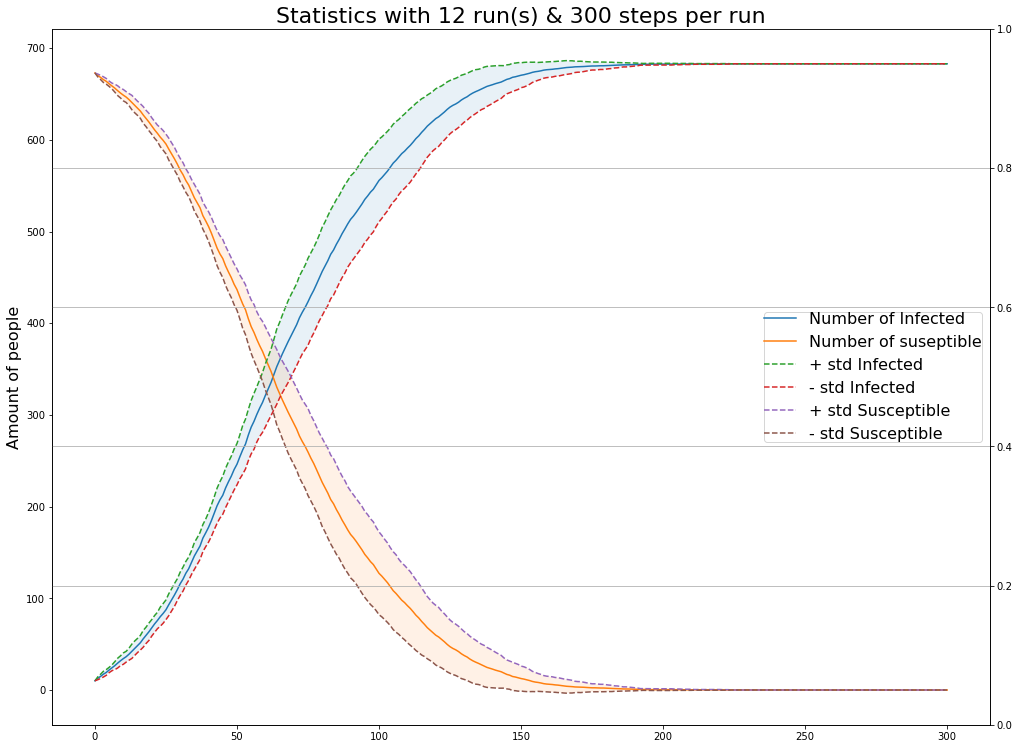

In [9]:
model_2 = random_walk_epidemic(50, 50, 683, 10, 0.9)
stats_2_initial = model_2.stats(300,12 , pl=False)

## Comment(s) part 2

When assessing the case of 10 intial infected walkers, we can clearly see that the level of infected converges towards the total population more rapidly - Approximately twice as quick than case 1, the majority of the population becomes infected. The whole population of __683__ is infected at the time of __150 days__. When observering the evolution of both the susceptible & infected populations, it is possible to notice that the standard deviation is continuously increasing with respect to thickness, util both susceptible & infected populations flatten out around time __150 days__ and will converge together with the mean infected & susceptible. The time elapsed when the infected populace overthrows the susceptible populace is approximately at time __65 days__, this illustrates an even more dramatic evolution in this population when compared to case 1. Even as the as standard deviation $\sigma$ is increasing in thickness, the thickness is most likely halfed in magnitude compared to __case 1__. This indicates less variation among different simulation runs.

### Reflection Part 2

It is quite intriguing to see the effects of changing the intial conditions had on the development of the walkers population. After managing the implemention of the walkers plus the `plot_numbers()` function, it is rewarding to see that the comprehensively connected class of `random_walk_epidemic()` is so succesful in its executions and relative speed when performing the stats function, and how the minor adjustment of one variable can affect the result so significantly.

## Part 3

### Introduction Part 3:

The last project demonstrated how rigid an analytical solution can be in certain scenarios, such that it does not account for random events which do occur in the physical world. In order to understand how the numerical approach by random events differs from standing analytical solutions (from project 3), there will be conducted analyzation of our previously examined numerical number plots (above). These will be compared with analytical solution set to have similar initial conditions as these numerical estimations. An implemention of a derived analytical infection rate also to be known as $\beta$, to display how infection rate is dependent on the current distribution of population.

$$ I(t) = \frac{N}{1 + \frac{S(0)}{I(0)}exp^{-\beta t} } $$ where $N$= total population, $S_0=S(0)$ is number of healthy people at $t=0$, $I_o=I(0)$ is number of infectious individuals at t=0, and $\beta(t)$ is a function that describes the effective rate of infection per unit of time.

In [10]:
def I(t, beta= 0.06, S0 = 682, I0 = 1):
    """
    The analytical solution for the zombie population.
    
    Parameters
    ---------------
    t: the Current time (int, float, array)
    beta: Infection rate (float)
    S0: initial number of people (int)
    I0: initial number of infections (int)
    
    Returns
    ---------------
    The analytical solution for the zombie population at time t. (int, float, array)
    """
    return (((S0+I0)/(1+((S0/I0)*np.exp(-beta*t)))))

def S(t, beta= 0.06, S0 = 682, I0 = 1): 
    """
    The analytical solution for the human population.
    
    Parameters
    ---------------
    t: the Current time (int, float, array)
    beta: Infection rate (float)
    S0: initial number of people (int)
    I0: initial number of infected (int)
    
    Returns
    ---------------
    The analytical solution for the human population at time t. (int, float, array)
    """
    return (((S0+I0)*(S0/I0)*np.exp(-beta*t))/(1+((S0/I0)*np.exp(-beta*t))))

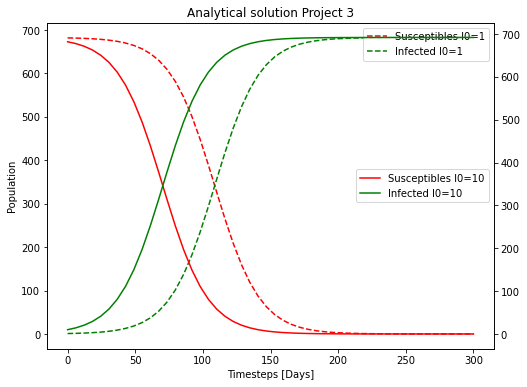

In [11]:
t = np.linspace(0, 300, 50)
fig,ax1=plt.subplots(figsize=(8,6))
ax1.set_title("Analytical solution Project 3")
ax1.plot(t, S(t), '--',color = 'red',label = 'Susceptibles I0=1')
ax1.plot(t, I(t),'--', color = 'green',label = 'Infected I0=1')
ax1.set_ylabel('Population')
ax1.set_xlabel('Timesteps [Days]')
plt.legend(loc='upper right')

ax2=plt.twinx(ax1)
ax2.plot(t, S(t,I0=10), '-',color = 'red',label = 'Susceptibles I0=10')
ax2.plot(t, I(t,I0=10),'-', color = 'green',label = 'Infected I0=10')
plt.legend(loc='best')

#### Intially Infected = 1 individual

In [12]:
display('Analytical solution considering susceptible individuals from project 3 after 150 days',S(t=150))
display('Analytical solution considering infected individuals from project 3 after 150 days',I(t=150))

# Retrieve our new results

Infected = stats_1_initial['Mean Infected']
Susceptible = stats_1_initial['Mean Susceptible']

display("The numerically estimated amount of susceptible after 150 days is:", Susceptible[150])
display("The numerically estimated amount of infected after 150 days is:", Infected[150])

'Analytical solution considering susceptible individuals from project 3 after 150 days'

53.02237335922173

'Analytical solution considering infected individuals from project 3 after 150 days'

629.9776266407782

'The numerically estimated amount of susceptible after 150 days is:'

438.8333333333333

'The numerically estimated amount of infected after 150 days is:'

244.16666666666666

#### Intially Infected = 10 individuals

In [13]:
display('Analytical solution considering susceptible individuals from project 3 after 150 days',S(t=150,I0=10))
display('Analytical solution considering infected individuals from project 3 after 150 days',I(t=150,I0=10))

Infected_2 = stats_2_initial['Mean Infected']
Susceptible_2 = stats_2_initial['Mean Susceptible']

display("The numerically estimated amount of susceptible after 150 days is:", Susceptible_2[150])
display("The numerically estimated amount of infected after 150 days is:", Infected_2[150])

'Analytical solution considering susceptible individuals from project 3 after 150 days'

5.77564069714118

'Analytical solution considering infected individuals from project 3 after 150 days'

686.2243593028588

'The numerically estimated amount of susceptible after 150 days is:'

12.5

'The numerically estimated amount of infected after 150 days is:'

670.5

### Comments first part of part 3

The cell block displayed from project 3 can be determined to be more rapidly converging than the __part 1__ case. It seems that the analytical solution reaches zero susceptible at time __200 days__, whereas __part 1__ reached zero susceptible at time __350 days__, this is big difference between these two models considering that the analytical compartment models also include 1 single infected to the population. But one of the attributes that is lacking in project 3 is the standard deviation. In order to compare the results, we extracted the values for the analytical models & numerical models at timestep __150 days__. The significant difference is observed between the numerical and analytical models when 1 person is infected initially. It can be observed that the analytical model has a population of `630` infected, whereas the numerical approach estimates a magnitude of `276` infected.

When the initially infected people is increased to 10 walkers, more similarities between the analytical & numerical approach are observed. Both appear to have reached 0 susceptible & the maximum amount of infectious at timestep __150 days__. The imported values from timestep __150 days__ is gives that the analytical model contains `686` infected & numerical model has  `674` infectious at this instant, and this is pretty similar levels. To summarize, the analytical model is not quite realistic in every situation, for example in the case with one initially infected the analytical model converged too fast when compared to the numerical model. Furthermore, the analytical model is deemed to be more similiar to the numerical approach when the number of initially infected people was set to 10.

### For the second part of part 3:

As for the analytical $\beta$, the solution derived from the provided equation is performed below.

__Project 3: Analytical $\beta$__

$$I(t)=ln(\frac{N}{\frac{S_0}{I_0}e^{-\beta t}+1)})$$

$$\frac{I(t)}{N} = \frac{1}{\frac{S_0}{I_0}e^{-\beta t}+1)}$$

$Taking Recipricals:$

$$-I(t)N = \frac{S_0}{I_0}e^{-\beta t}+1$$

$$\frac{I_0}{S_0}(-I(t)N - 1) = e^{-\beta t}$$

$$\frac{I_0}{S_0}(-I(t)N - 1) = e^{-\beta t}$$

$Taking Recipricals:$

$$\frac{I(t)S_0}{I_0(N-I(t))} = e^{\beta t}$$

$Natural Log of Both LHS & RHS:$

$$ln(\frac{I(t)S_0}{I_0(N-I(t))}) = {\beta t}$$

$Solving for \beta:$

$$ {\beta} = \frac{1}{t}ln(\frac{S_0I(t)}{I_0(N-I(t))})$$




1
2
3
4
5
6
7
8
9
10


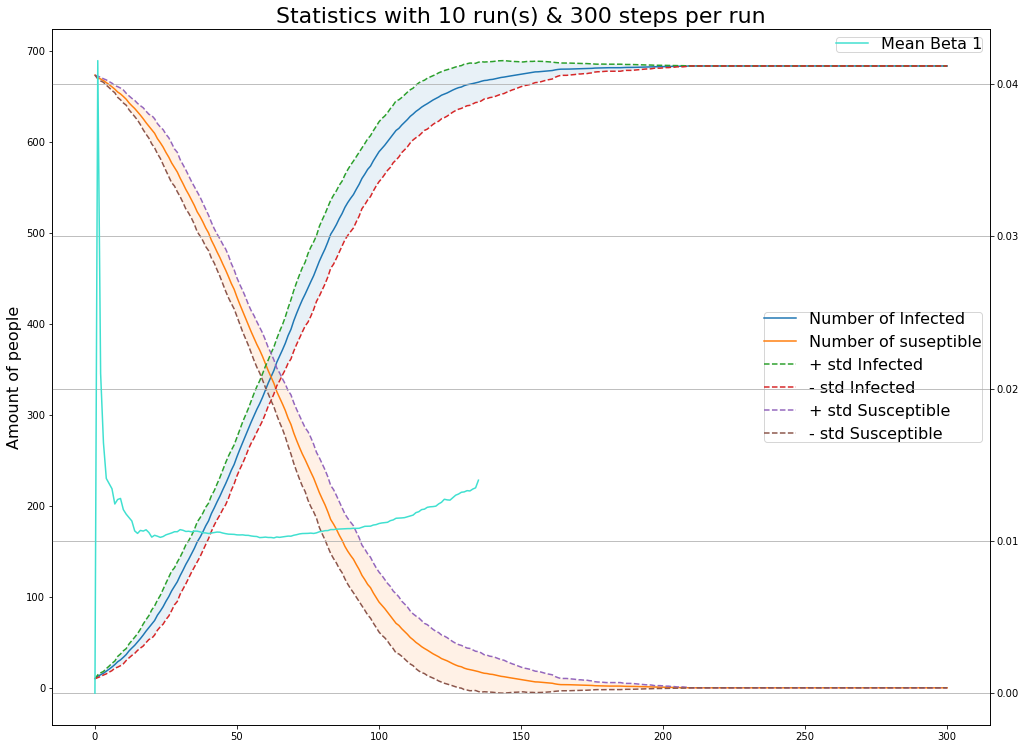

In [15]:
model = random_walk_epidemic(50, 50, 683, 10, 0.9, ana_beta=True)

Beta_ana = model.stats(300, 10, pl=False)

In [ ]:
Beta_ana['Mean Beta 1'].replace([-np.inf,np.inf],np.nan)


### Comment 2nd part 3
The analytical solution has been derived to be $ {\beta} = \frac{1}{t}ln(\frac{S_0I(t)}{I_0(N-I(t))})$, and implemented within the `random_walk_epidemic` class. It can be seen that the analytical solution will start from a global top value  when intialized in the estimation, then it will drop proportionally as the infecteous population increases. The current infecteous population and the time regulates the continuation of the analytical $\beta$, it can be observed that as the infectous population rises, $\beta$ will eventually flatten out and stablize at a magnitude of approximately __0.0125-0.0150__. 

### Reflection Part 3

After managing to implement the code in our class, the process of analyzing the random-numerical approach we've designed within `random_walkers` was straigth forward. It was expected that the compartment model would differ from the shape of the numerical approach, but it was quite suprising that the compartment model when considering 10 intial infected walkers was quite similar to the implemented function in our class. At this point, we were uncertain if the analytical $\beta$ was a good approximation to a physical system since it seems to be purely dependent on infectious population and only some intial conditions. Becasue of this, perhaps it would struggle to be relevant as more layers were to be added within the model.

# <u><font color=red>__Exercise 3: Estimating parameters, and incorparting age classes__</font></u>  

## __Introduction Excercise 3:__

The main objectives of Excercise 3 were to implement the numerical $\beta$ into the class in order to display how the reduction in susceptible population impacts the infection rate per unit time. This numerical $\beta$ might be more susceptible to more variation than the previously mentioned analytical $\beta$. Once this comparison is performed, we will then determine the impact of having a different age class which makes the probability of movement less frequent. The trend of $\beta$ gives insight into whether a particular disease has the ability to spread throughout a population and how fast this occurs.  

### Part 1 

By observing the random movement of `walkers` in our random-walk model we are able to tabulate the change of Susceptible to Infected individuals. Apart from the analytical equation for $\beta$ as seen above we have another representation for $\beta$ which is provided given the combination of the 3 following equations:

$$\frac{dS(t)}{dt}= -\beta*\frac{S(t)*I(t)}{N} $$
$$\frac{dI(t)}{dt}= +\beta*\frac{S(t)*I(t)}{N} $$


$$\beta*\Delta t \approx  -\frac{(S(t)-S(t-\Delta t))*N}{S(t)*I(t)}$$

Provided this formula, $\beta *\Delta t$ was solved at each respective timestep. When computing the mean numerical $\beta$, we initially saw that many values were in fact `0`. This can largely be explained by the fact that $S(t)-S(t-\Delta t) = 0$ since the number of `Susceptible` individuals does not change from the previous step. In order to correct for this, we chose to initiate a condition that made any value of $\beta = 0$ equal the previous $\beta$. When running multiple simulations and taking the respective mean and median. This made our numerical $\beta(t)$ curve much more reliable and feasable to compare against the previous analytical $\beta$ values as seen in the Exercise 2. It is important to note that we are analyzing only the 2 compartments: Susceptible and Infected individuals. Later in Exercise 4, we will account for a more realistic scenario which accounts for the `Recovered` and `Dead` populations. With these 2 groups in mind we will modify the above equation for numerical $\beta$ so that the total population equals the initial population - the dead population and the non-infected population equals the sum of the recovered and susceptible populations. 

1
2
3
4
5
6
7
8
9
10


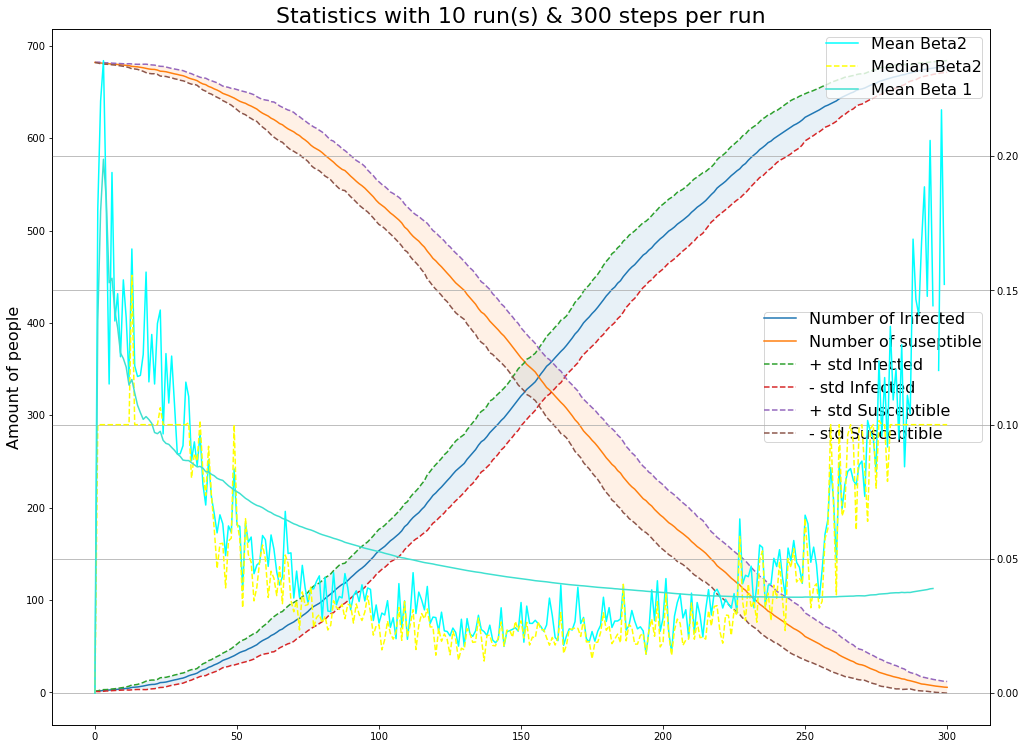

In [17]:
model_ex_3 = random_walk_epidemic(50, 50, 683, 1, 0.9,activation_beta=True,show_median=True,ana_beta=True)
Beta_visual = model_ex_3.stats(300, 10,pl=False)

### Comments part 1

It is observable from our plot of 100 runs and a `n_final` of 300 steps per run, the $\beta$ value is noticabely different depending on the equation for $\beta$ utilized. For example, the analytical $\beta 1$ as seen in Project 3 begins approximately around ~__0.2__ and trends smoothly downward exponentially to ~__0.03__ . The step in which this was reached is close to __225__ timesteps. When analyzing the numerical $\beta 2$ for each respective timestep we can see the initial value for $\beta 2$ is close to $\beta 1$, however, it holds a steeper slope at almost all timesteps. This can be attributed to the fact we are substracting the number of Susceptible individuals at the current timestep from the number of Susceptible individuals at the previous timestep. It is important to note that we added a condition that dictated if this equivelates to __0__ we set $\beta 2$ to the previous $\beta 2$. If this were not implemented, we would observe that the $\beta 2$ trend would be scewed largely downward since at multiple times initially in a simulation there would be no difference from the number of Susceptible individuals. It is also worth mentioning that the $\beta 2$ being plotted for is in fact $\beta \Delta t$ with the assumption that $\Delta t$ is 1 since we are performing the numerical calculation at every timestep. The values for $\beta 2$ begin approximately around ~__0.175__ and trends smoothly downward exponentially to ~__0.025__ . The step in which this was reached is close to the crossing point of the populations. It is also apparent that $\beta 2$ trends upward exponentially after this crossing point. This can be explained due to the number of Susceptible individuals is for the most part very low and the values of $\beta 2$ are extremely close to 0. 




### Reflection part 1

It is worthwhile to note that the numerical equation for $\beta 2$ should account for additional population groups such as the dead and recovered as we will see in the below Exercise. It would be interesting to utilize a different $\Delta t $ which was not 1. This perhaps would give us an improved approximation for $\beta 2$ given that we would not necessarily use the previous non-zero value. Lastly, if we had to put more confidence in a given $\beta$, it would be $\beta 2$ since it utilizes the same population numbers as reflected in the model used. 

## Part 2

Adding an extra parameter to our `Walkers` function was the __age_class__. We have assumed that the population `(N)` is split equally between elderly individuals `(Walkers_old)` and young individuals `(Walkers)`. Elderly individuals have a 20% chance of remaining in place and 20% chance of moving in 1-4 directions [E,W,S,N]. When the `forward_move` function is called both age classes move `if age == True`. 

When contrasting the differences in $\beta 2$ between these 2 respective age classes, we are able to see that a disease such as Covid-19 will propogate faster in the `age_class`. This can be observed when comparing the trends of $\beta$. The age_class population's $\beta(t)$ declines significantly faster than that of the base case population's. This confirms that with a higher $\beta(0)$, a disease holds the ability to progress faster through a given population. 

1
2
3
4
5
6
7
8
9
10


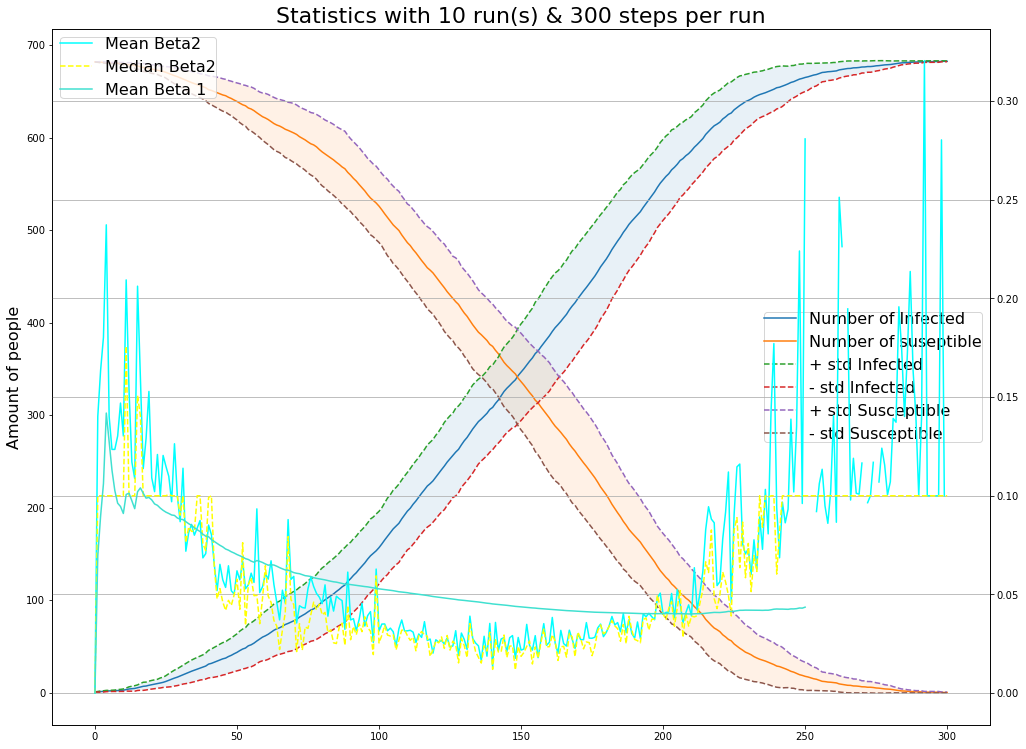

In [18]:
%matplotlib inline
old_state=random_walk_epidemic(50,50,683, 1, 0.9, age=True,activation_beta=True,show_median=True,ana_beta=True)
old_stats=old_state.stats(300,10,pl=False)

### Comments:

The plot without the age class shows that the infected becomes equal to the suseptible, which is approximately at __160__ timesteps. The plot with the age class occured approximately at timestep __130-140__. Thus, we can conclude that when the infection rate $\beta 2$ reaches its minimmum value earlier in the elderly population. This is because of the rapid increase in the infected population. This can be explained by the lack of motion causing more interactions with the infected. 

This can be summed up simply as the overall trend of the populations remain similar, i.e. they still converge to the infected taking over the entire population, and the populations are the inverse of each other. We observe from the extracted data on __$\beta 2$__ that the values become __inf__. This is because when $S(t)$ = 0 the equation breaks down as we arrive at the division by zero. 

### Reflections:

It is questionable that the elder population can be represented simply by applying a chance of staying still. Additionally, we belive the cause of more interaction of the elderly population is due to the walkers moving past each other, but shouldn't moving past one another also cause interaction? Thus, wouldn't the virus be halted by less motion by the elderly? Based on this situation it is intepreted that as the elderly are more vulnerable to infection, they remain stationary & the infected are in motion. Also, provided the way this was implemented means that the infected-elderly move at the same rate as a non-infected-elderly.  

# <u><font color=red>__Exercise 4: Implement your own scenario__</font></u> 



## Introduction:

We expanded the compartmental model to include __RECOVERED__ & __DEAD__ walkers. This is done to make the model more realistic, by adding more physical states onto the walkers. We will introduce __quarantine__ & __masks__ as virus countermeasures, and will observe what effects these measures has on the model. Variation in distance (__nx,ny__) & population size (__N__) will be adjusted, this is done for finding the parameters where the virus transmission is thriving and the oppsite.

__Ex. 4 assumptions:__

When expanding the compartmental model from __S,I__ to __S,I,R,D__ some concessions were necessary. First, there is the matter of the order of priority, that meaning which is calculated first. First the number of infectious is determined, then the number of recovered, and finally the number of deaths. Meaning that someone can be infected then recover or die at the same timestep. An exponential distribution was applied to the probability of tranistion between (infected->recovered) and (infected-> dead) compartments. This was deemed to be a more appropriate distribution versus that of uniform largely because an exponential distribution is a characteristic obsered in nature. We assume that the recovered people are immune for a constant amount of timesteps, after this period they will become susceptible. There are reasons to believe that people are only immune for a certain period of time, such as antibodies and that they may take better personal precautions for a period of time after being infected. That said, the true power of this assumption is that they can join the susceptible population generating more targets for the infected. This means that the virus can spread through the same population again, making it possible to model the second, third, etc, wave of infection. Which is the primary reason we use this assumption.

The implementation of the recovered population causes the numerical beta to have certain negative values, this is because the recovered, after the period of immunity, will become susceptible. This increases the susceptible population in comparison to the previous time step, producing a negative number. This was fixed by accounting for the recovered and dead population in the formula. We made S(t) = S(t)+R(t) and the N = N-D(t), this fixes the issue and works for the other cases were D and R are not accounted for as D(t) and R(t) simply become equal to zero.

We also assume that the quarantine can be represented by a grid of immpassible walls with passageways between adjacent grid blocks. The passageways represent that one cannot completely isolate oneself from everyone else, after all we still need food, drink, clothes, etc. We assume that masks can be applied to the entire population by reducing the chance of infection by a constant amount.

In order to show the effects of these new implementations we will change parameters as needed, usually this involves adjustment of intial infected from 1 to 10 or oppsite.



## Lets go Quarantine

With the purpose of relating estimated data from the model to a real world scenario, it was determined to implement a quarantine state at $time$ = 0 for the whole environment. The designed quarantine area will restrict the freedom of movement for the walkers. Analyzation of its effect can be conducted to discover characteristics of how a quarantine situation can affect the virus transmission

In [ ]:
model_quran = random_walk_epidemic(50, 50, 683, 1, 0.9,quarantine=True,infect_tol=0.01)
model_quran.simulation_run(1000, pl=True,plot_freq=25)


In [ ]:
model_quran = random_walk_epidemic(50, 50, 683, 1, 0.9,quarantine=True,infect_tol=0.01)
quarantine= model_quran.stats(500,100,pl=False,plot_freq=125)

### Comments: Quarantine

The intial assumption was that restriction of travel could halt the transmission of the virus, but it seems to empower the infected walker within each of the 16 blocks which makes up the quarantine wall, within the block the susceptibles are more quickly absorbed the the virus. It manages to halt the spread by a small bit in this run instead of of ending the susceptible population at __350 days__ it is now terminated at __500 days__ approximately. The two graphs will cross at __200 days__, which is __50 days__ more than previously. Could be more efficent if the walls were establish from the start of the run, although that would not be very physical, its doubtful a country or area is eagerly restricting its population which follows with an economic throwback as a result of the restrictions. How the function works is that it activates the wall when a percentage of the population is becoming __INFECTEOUS__. The quarantine as counter-measure does not seem to be stop infection transmission solely by itself.



### Reflection: Quarantine


The implementation of a quarantine was a fun example showing the effects of quarantine, as it was first believed to have good effects to minimize the virus transmission. By the fact that the virus was more rapidly evolving with each block, this was somewhat suprising but gave sense when analyzed since for each block infected there is a higher probability to super-spread the virus within the infiltrated block. However, in the overall case it does limit the infection, based on the time of maximum infected walkers increasing from __350 days__ to __500 days__.

### Implementing the effect of a "Mandatory" use of masks to reduce infection

__Introduction:__

By citing the research by the US library of medicine it contains finding of the effectiveness of the medical masks, that has been growing in popularity during the Covid-19 pandemic, it states that the masks effectiveness against transmission is estimated to be __80%__ __( US library of medicine [1] )__. By the assumption that the masks are used correctly, however, it can be assumed that most people do not use the masks correctly and periodically. By these assumptions we can set the efficiency of a mask in our population to reduce the effectiveness of infection rate __q__ to __50%__ to consider not everyone is that thorough when taking preventive measures.

In [ ]:
model_b = random_walk_epidemic(50, 50, 683, 1, 0.9,
                               mask=True,infect_tol_m=0.01)
b=model_b.stats(500,10,pl=False)

### Comments masks

To observe the effect of implementing masks it is necessary to keep the model as steril as possible, now we only include the development of suseptible & infected amount. It can be spoted that the masks will not stop the virus but it will halt it great deal, the susceptible amount will now converge at zero at timestep __420 days__ wheras the previous case it was fully converging at __350 days__. This indicates a 50% effective mask use, and intialized in early stages do have a contribution to halt transmission speed between walkers. The point where the curves cross is shifted by __50 days__ to __200 days__. The crossing point and the end point implies that the trend of the model has been extended by 50 days, this is because the mask is a passive multiplier that is constantly active when activated.

### Reflection masks

We could have simply used the 80% effectivness of mask found in the __US libary of medicine__ article, but it is assumed to be a safe assumption that in the real world not everyone is equally likely to obey & perform proper usage of the masks. Short term the quarantine has the same effect as masks as seen by the crossing point of the populations however, long term it seems to be more effective by __100 days__. This is because masks are a passive multiplier, and the quarantine is physically present in the model provides a less uniform effect on the model.


### Implement Recovered walkers
__Introduction:__

To relate the simulation to the real physical world again, there is a assumption that infecteous can't stay in this state forever. If the conditions are right the infected walker should recover from the virus, and have enough antibodies to temporarly become immune. The model uses a recovery rate (r) that is used each timestep for each infected walker to determine if they recover. based on ___(worldmeterinfo[4])___ the recovery percentage over approximately a little over two weeks equals 96%, dividing this by an assumed recovery time of 20 days (conviniant) gives a recovery rate of 0.048 each day. Thus, this is the __r__ we will be using in the models form this point on.  

In [ ]:
Recovered_model = random_walk_epidemic(50, 50, 683, 1, 0.9,rec=True,r=0.048,immune_period=50)
recover=Recovered_model.simulation_run(1000,pl=True)

In [ ]:
Recovered_model = random_walk_epidemic(50, 50, 683, 10, 0.9,rec=True,r=0.048,immune_period=50)
Recovered_model.stats(1500,10,pl=False)

#### Increase timestep to see continuation of the plot

In [ ]:
Recovered_model_test = random_walk_epidemic(50, 50, 683, 1, 0.9,rec=True)
Recovered_model_test.stats(2500,10,pl=False)

In [ ]:
Recovered_model_testd = random_walk_epidemic(50, 50, 683, 1, 0.9,rec=True,activation_beta=True)
Recovered_model_testd.stats(2500,10,pl=False)

### Comment(s): Recovered walkers

If the recovered rate is given by a `r=0.048`,`immune_period=200` The curves stabilizes after __200 days__, the infection is still occurring however, as no one is dying the populations simply feed into each other forever. The susceptible population will experience a significant drop from __683 walkers__ to somewhere around __400 walkers__ , before it stabilizes at this level. The infectious will have a gentle increase in numbers until reached __200 days__ where it settles on a population around __50-60 walkers__. The recovered will gain an increased populace of around __200 walkers__, these population is vulnerable to change, because it can be determined that this population has the most significant standard deviation.






__The last image is deemed to not be likely reliable to the physical world because of a `r=0.01` & `immune_period=200`, but was created before the plots above. But it really catches the relation between the three states and adjustement of `r`& `immune_period`, so that it was chosen to discuss it anyway__


After applying the recovered population there are some attributes to point out has been deployed within the class, there is assumed that the recovered will not stay recovered forever, eventually by chance they will become susceptible again. Due to the face that their repeating the cycle by becoming susceptible then they are again in risk of being infected by infecteous walkers. The period which the recovered are going to maintain the __STATE of RECOVERED__ is to be known as an immunity period. As an default case it is assumed to be 200 days, but could be changed to an another value if a more suitable value is determined (No clear data source on this matter), but it is known some have experienced __covid-19__ twice allready. Anyhow, in terms of analyzing what is observed in the plot, it can be seen an intial wave where the suseptible,infected and recovered populations are crossing at time __100 days__, this could be a visualization of the first wave experienced. After the intial stage, detection of ocillation of all the populations can be determined and this occilation will continue infintely it seems, only by a heavly reduced amplitude as time goes. However, the magnitudes of these populations are stablized at different levels, SUSCEPTIBLE walkers make the smallest population, followed by INFECTEOUS walkers and the most significant magnitude of population is the RECOVERED walkers. Can be seen that occilating new waves can be intepreted throughout the whole periode, but the amplitude of these decrease as time goes. The numerical beta is included, it constantly dips & peaks after the intial occilation, implying small waves of infection & recovery.


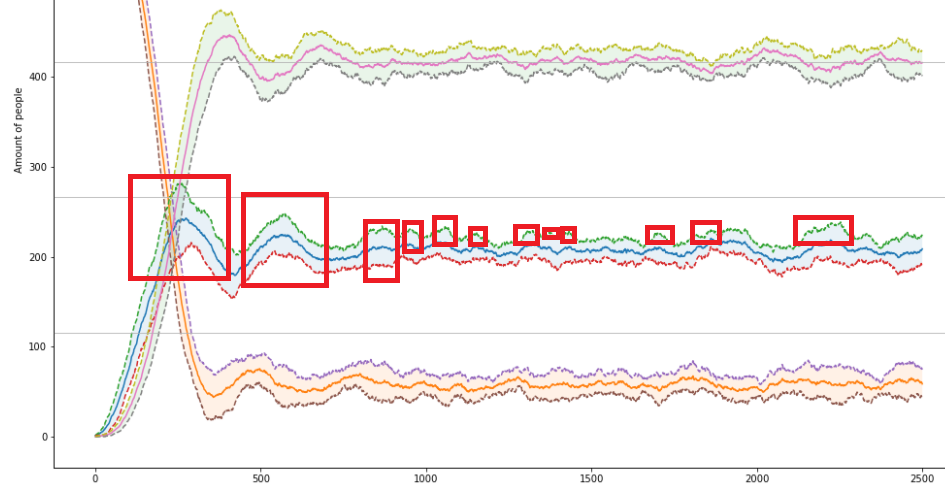

Figure 2: Shows intrepreted peaks as new waves
### Reflection(s) Recovered walkers

The level of hype was sufficient when observing the data given by the applying the RECOVERED STATE. It you be argued that the initial stages are the worst because of sudden increase in infectious and then followed by significant oscillations before stabilizing to be more manageable. Could it be that countries which are trying/tried to gain a "population immunity" for example __Sweden__ is most likely going to experience 3 major waves, before the pandemic situation is more manageable. After these majors’ waves are smaller waves, indicating that the virus cannot be demolished and will become more generalized into the daily life, for example the __Covid-19 virus__ could become as usual as an __flu__ during the winter

### What about the dead?
__Introduction:__

A global deadly pandemic must account for the dead right? The INFECTEOUS walkers got to have a probability of dying with this virus within their bodies, if not, what is the fuss about?
A dying function should be able to turn the walker state from `INFECTEOUS` to `DEAD` and remove these from the map, because of a __stairway to heaven__.
What are the effects the walkers will disappear because of laws of life? 
Let’s find a suitable estimate for the death rate, let’s use the current death rate for Norway for patients becoming diseased WITH covid-19. $\frac{dead}{infected} = \frac{387}{40 022} = 0.00966$ __( Folkehelse instituttet [2] )__


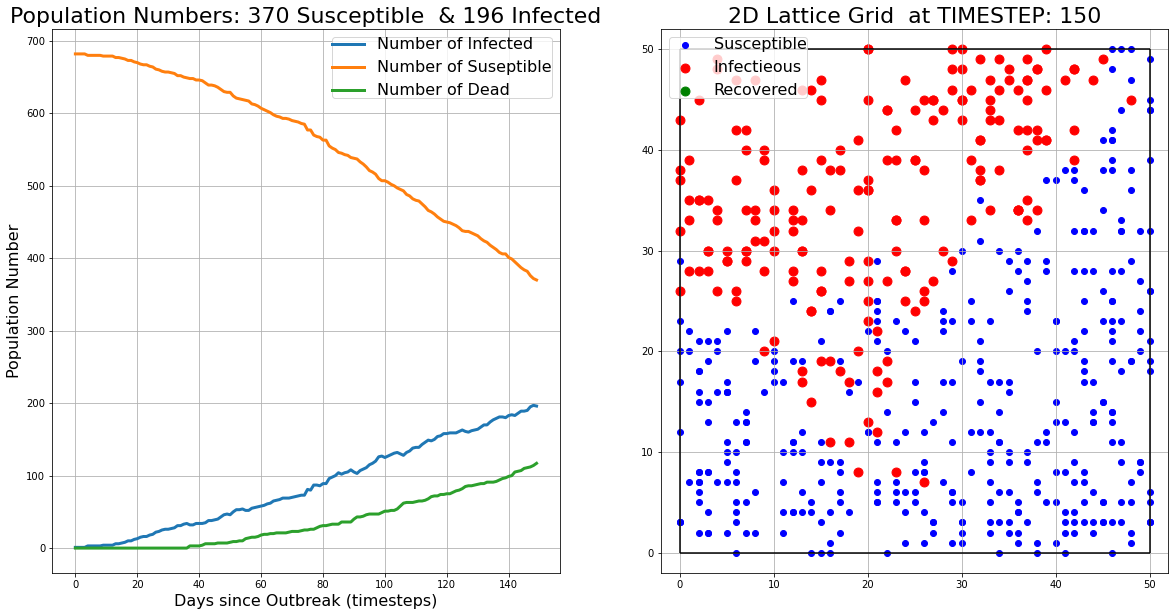

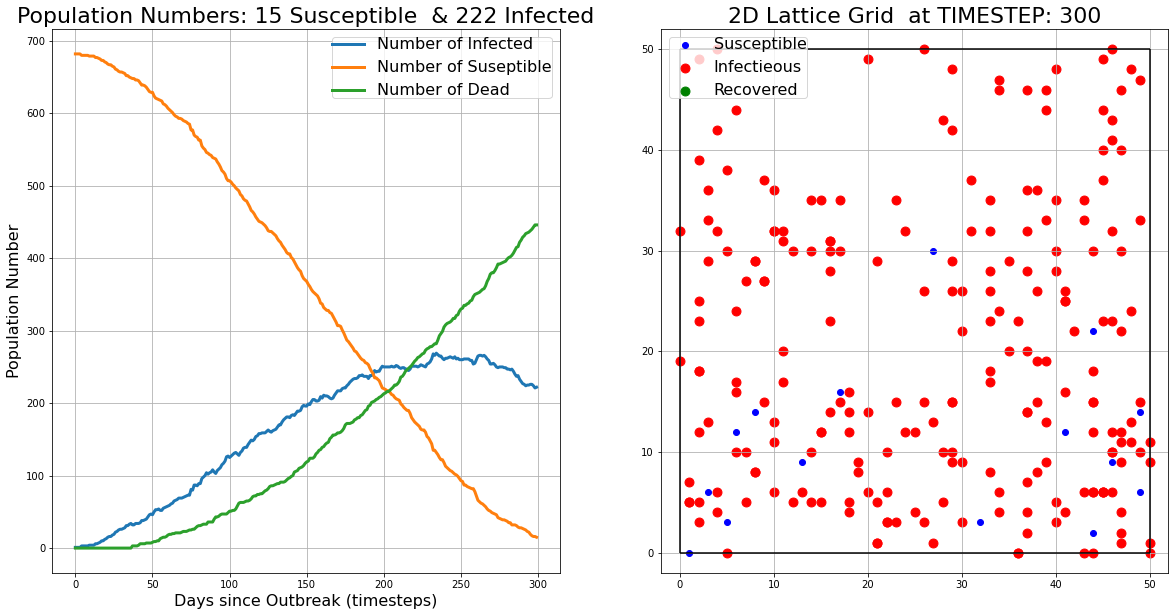

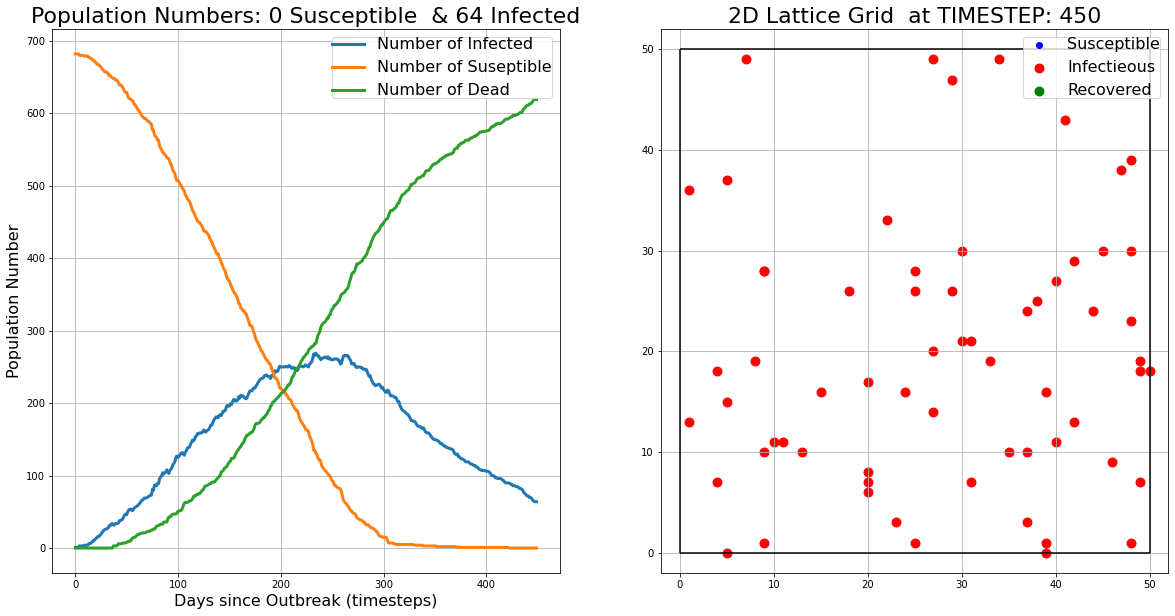

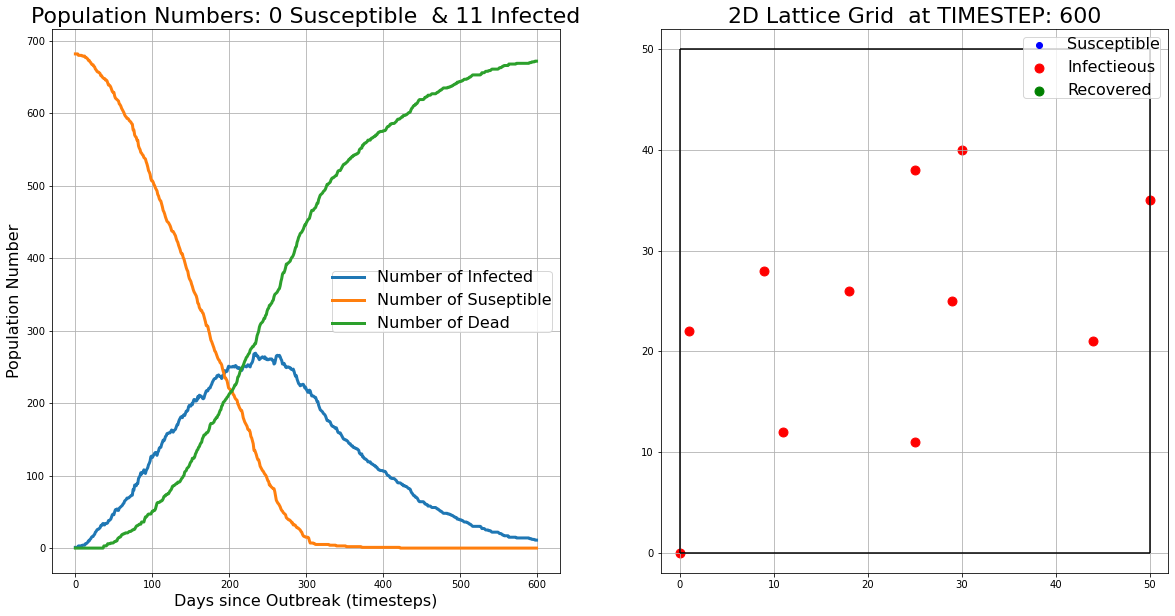

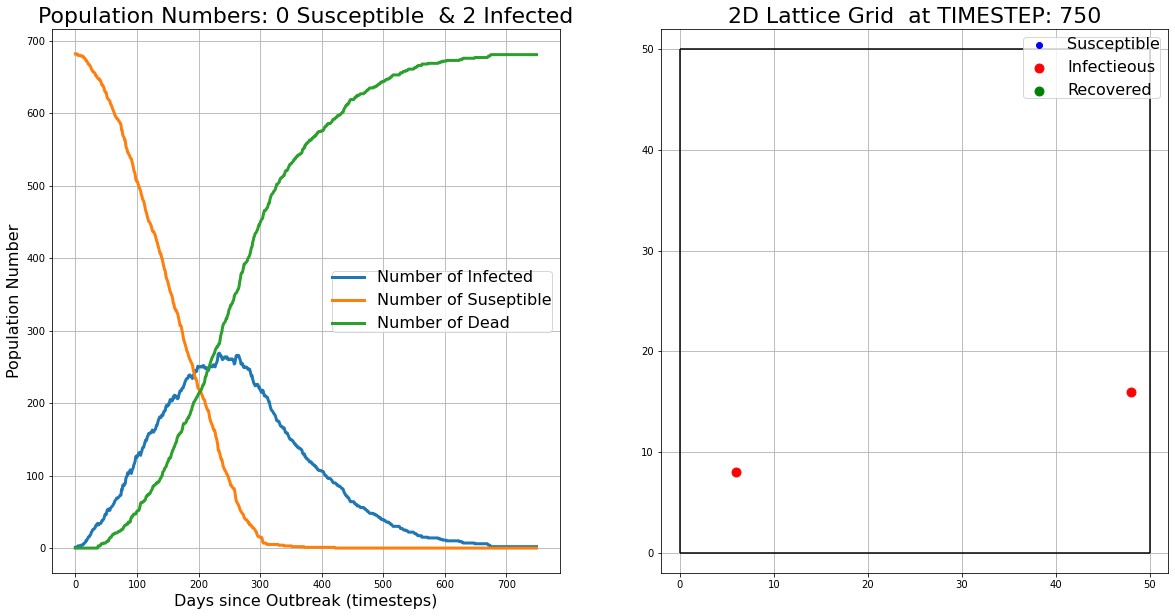

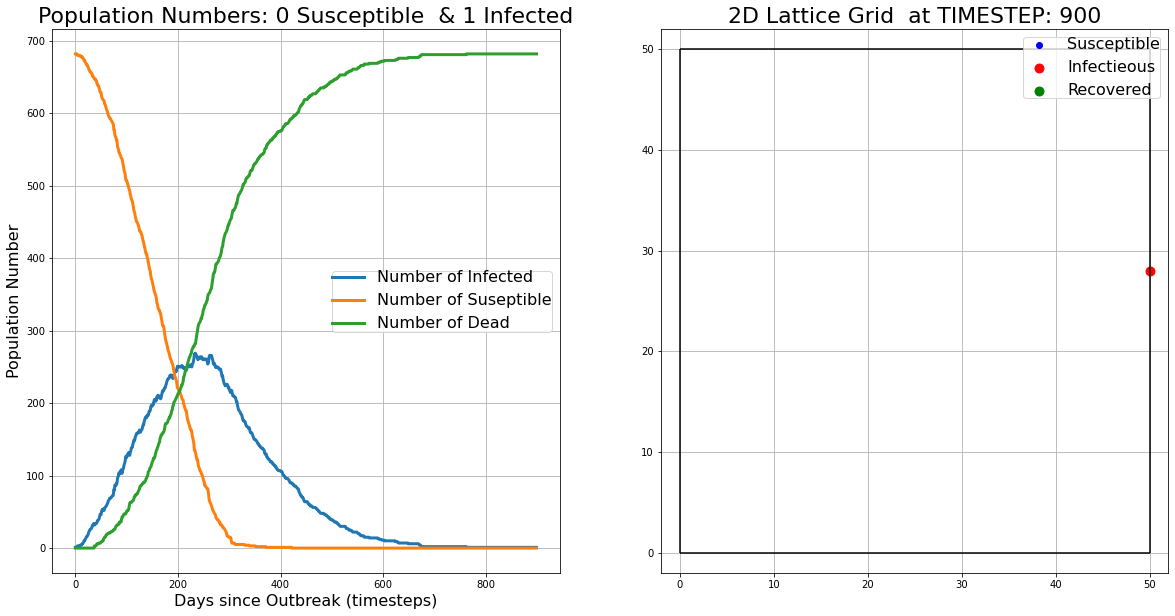

In [3]:
Dead_model = random_walk_epidemic(50, 50, 683, 1, 0.9,dead= True,death_rate=0.00966)
dead=Dead_model.simulation_run(1000,pl=True)

1
2
3
4
5
6
7
8
9
10


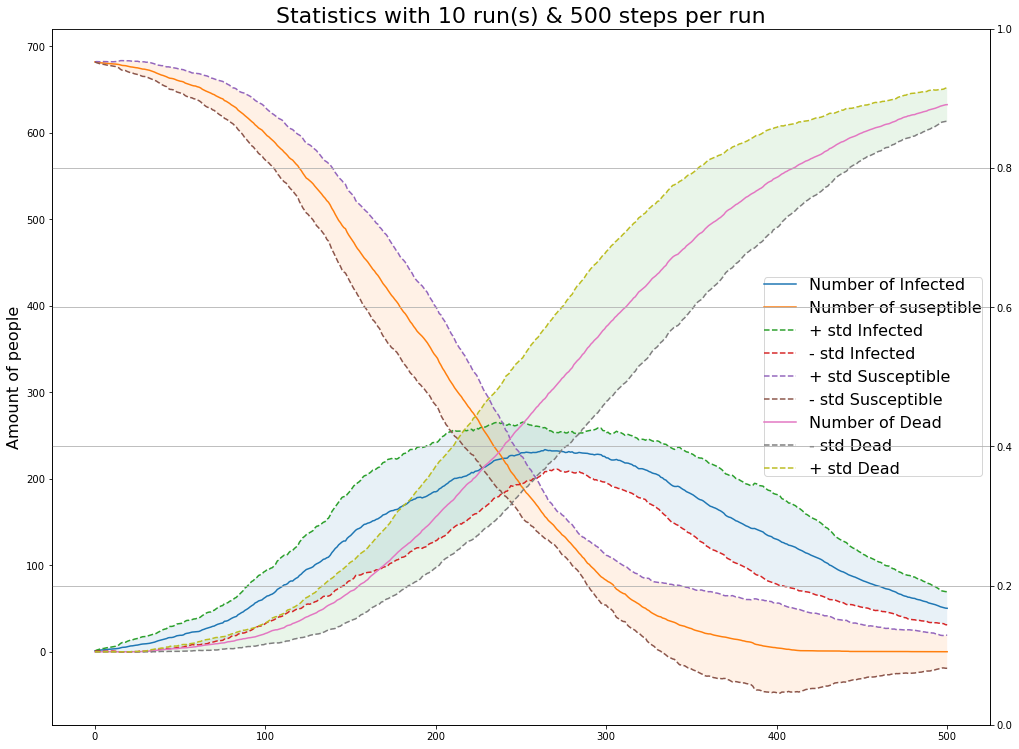

In [4]:
Dead_model = random_walk_epidemic(50, 50, 683, 1, 0.9,dead= True,death_rate=0.00966)
dead_stats=Dead_model.stats(500,10,pl=False,plot_freq=300)

### Comment(s): Dead

Based on analyzation it can be determined that a grim future is expected when only dead are considered with the susceptible & infection populace, it turns out everybody dies unfortunately. This could be realistic if all susceptible become infected and none of the infected will recover, then there is a chance for each day that the infected walker will die. This might not be quite plausible scenario but what if recovered was included into the equation to make the dead more realistic, because it would offer another alternative than stay infected or dying. Shows a cumulative trend, as there are no countermeasures and no recovery, the population becomes entirely infected and dies off. Using a much higher death rate would cause the infected population to die before they could spread the disease. Observation of the plot shows that when the susceptible population is surpassed by the infectious population in amount, the infection slope decreases constantly. This is because of that there is less walkers to infect, thus the infected will die off, and there are not enough susceptible walkers to offset this.

### Reflection: Dead

It is believed that because of the fact that death is the only alternative if infected, there is a constant chance of dying for each passing day a walker remains infected for, but the joint probability increases each day.

## Virus introduction to a remote area (Country)

Previously, we have now looked at cases where it is considered to be moderately dense cities, but what if the distances between each walker was increased. This could be especially be relatable to many places in Norway, as well as other places in the world. To show the effects of these distances in its purest form, there is not going to be included any recovered or dead walkers, this is to check how these distances handle `INFECTEOUS` transmission over time without being diminished by other factors. Now we assume and grid of __500(nx)x500(ny)__

In [ ]:
country_land_model = random_walk_epidemic(500, 500, 683, 10, 0.9)
country_land_model.simulation_run(12000,plot_freq=75)

In [ ]:
country_land_model = random_walk_epidemic(500, 500, 683, 10, 0.9)
count_stats=country_land_model.stats(12000, 10, pl=False)

### Comments: Country
Based on these estimations when walkers are roaming in a remote area, it will take the __12000 days__ which is about 33 years, to infect approximately __65%__ of the population, this is allmost 33 years with virus-transmission without countermeasures or recoverability. This seems to be more effective than any quarantine wall or local authority action. By reducing the amount of interaction between the walkers it is clear that the virus cannot be transmitted to a susceptible walker. The reduction of interaction between humans does look promising.

### Reflection: Country

Was somewhat reassuring that the interaction between humans are the main way the virus will spread, by an increased spaces it would not be possible to infect if collisions were not happening, which is sensible. There is a weakness with this model, that is interaction between humans in rural areas will more frequently occur via for example local stores. Thus the virus should be spread faster than shown in the model.

## Lets observe the cities

__Introduction:__ 

Now we have moved the environment to a city environment where more walkers are located in proximity of each other, these conditions are believed to lead to more interaction between the walkers, thus leading to more infection. A significant increase in walkers are included in the grid.

In [ ]:
city_model = random_walk_epidemic(500, 500, 15000, 10, 0.9)
city_model.simulation_run(1200, plot_freq=200)

In [ ]:
city_model = random_walk_epidemic(500, 500, 15000, 10, 0.9,activation_beta=True)
city_model.stats(1200,2 , pl=False)

### Comments city life without care

When the model only considers suseptibles & infected walkers it seems that the virus was able to infected half the population by a timestep of __1200 days__, this can be compared to the previous case (rural area) where the amount of days was set to __12000__ to infect a similar portion of the population. It was suprising that the population was not utterly consumed by infected by this time, but keep in mind the grid has been extended to __500x500__. The infection rate has not really increased compared to base case, there are more infected because there are more walkers to infect, but the rate they are infected has not been changed.

#### Lets see if the city can establish countermeasures to contain the transmission

In [ ]:
city_model = random_walk_epidemic(500, 500, 15000, 10, 0.9,rec=True,dead=True,death_rate=0.00966,r=0.048)
city_model.simulation_run(1200, plot_freq=150)

### Comments city life with care

Now the countermeasures of the virus is implemented to see if it is possible to defeat the virus after 10 infecteous walkers has entered the environment. By observartion of the simulation run confirms that the countermeasures are helpful in this case, the countermeasures seems to be more effective for a grid with 500x500 than 50x50 because of the increased space between walkers.



### Reflection city life

Was suprising to observe how efficently the countermeasures worked on a population of this magnitude, but makes perfect sense that the walkers are less likely to collide with other walkers when the grid is elevated. However, the increased number of walkers was believed to carry the infection somehow, but the pandemic was completely annhilated from the initial stages.

### Lets activate both the dead and recovered
__Introduction:__

To establish a proper SIRD-model all of the parameters has to be activated at the same time, this is to observe how rules will coexist with the walkers environment. What are the effects, could it possibly be the model that properly illustrates how a pandemic exsists.

In [ ]:
Total_model = random_walk_epidemic(50, 50, 683, 10, 0.9,quarantine=True,rec=True,dead= True,
                                  mask=True,infect_tol_m=0.1,death_rate=0.00966, r=0.048, immune_period=50,
                                  activation_beta=True)


In [ ]:
tot_stats=Total_model.stats(1200,20,pl=False)

We increased the original population __N = 683__ to an order of magnitude ~ __2,250__ and this allowed for clearly outlining what attributes of our model can observed in our 2-D lattice grid as well as our population trends vs $time$. If the population number were for example too samll, we do not have models that converge as clearly.

In [ ]:
Total_model_bigb = random_walk_epidemic(50, 50, 2250, 10, 0.9,quarantine=True,rec=True,dead= True,
                                      mask=True,infect_tol_m=0.1,death_rate=0.00966, r=0.048, immune_period=50,
                                      activation_beta=True)
tot_stats_bigb=Total_model_bigb.stats(1200,3,pl=False)

1


In [ ]:
Total_model_default = random_walk_epidemic(50, 50, 2250, 10, 0.9,quarantine=True,rec=True,dead= True,
                                      mask=True,infect_tol_m=0.1,
                                      activation_beta=True)
tot_stats_default=Total_model_default.stats(1200,20,pl=False)

### Comments on Total 

At first it was decided to try simulating the all the included layers on a population of size of `N=683`, nevertheless when observing the final product, it was needed to emphasize the differences between the states. But to describe how the model was formed, the susceptible population was quickly reduced to __600 walkers__ and the infected population experienced some increase at the start of the estimation, but quickly reached its maximum value then declined slowly, and would be utterly eliminated approximately at __700 days__. The recovered walkers were observed to rise above the infected population and decrease as its population was dying or recovering. The dead were at approximately __75 walkers__ before stabilizing. To detect more attributes, lets increase the population size to add more dynamic to our model.

__N=2250 & I0=10__ 

Now as the population has been updated to `N=2250`, lets analyze the differences. The susceptible population experiences a substantial drop in magnitude __2250->750 walkers__, then a exponential increase of infecteous & recovered populations occur as a result of this drop. This would be intepreted as the first wave, followed by 3 additional peaks or waves __(see figure 2)__, these following waves will be decreasing in magnitude after this intial wave. Similar behaviour is represented in the susceptible & recovered population, while similarly the dead walkers will increase cummulatively. The standard deviation of all the factors are present but is not too great in magnitude. As the infecteous population rises in value as expected, the numerical $\beta$ follows these trends, showing the true waves of infection.


__N=2250, r=0.01, death_rate=0.01, immune_period=200 & I0=1__ 

This is a theortical case of a virus, not necessarly a existing virus.Using this lower recovery rate, the infection spreads more rapidly. This model shows the same trend as the previous one, just more emphasized, meaning more extreme changes in values. The immune period being __200 days__ is changing the late trends, people are immune for longer periode of time, meaning the infection does not spread as quickly later on. An interesting curve to observe is the dead population, as this population simply cumulates and will cumulate faster with more infected. The dead curve in this case shows a trend of increase and stablization to increase and stablezation, meaning the infected population increase and decrease then increased and decreased. This case clearly modeled the second wave of infection, which becomes obvious with these large swings in values. 

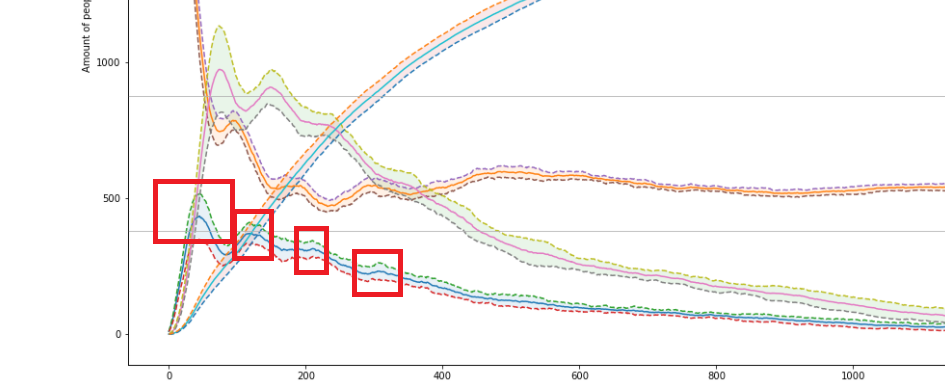

Figure 3: Showing wave-tops in the infecteous individuals population
### Reflection Total

We're pleased (extremely satisfied) that it was possible to model the second wave clearly, even with using some unrealistic parameters. There remains more implementations which could be added, as mentioned above. The model is significantly more complex than our previous excercises, which would strengthen its relevance to real world scenario(s). What is most interesting is how each group of the population is interacting with one another. For example, the trends at certain points in the model are proportional to one another and the upward increase or decrease can largely be explained as that of the second wave of infection. Since we were able to successfully model this wave, we can more closely determine if a quarantine or masks for example had an impact, and if so, by how much? A further scenario to implement is a population such as what is used in regards to a 2nd or 3rd wave as to simulate there being interaction with individuals of other cities - Like that of Trondheim, Stavanger, Oslo, or Kristiansand for example. 

# <u><font color=blue>__Conclusion:__</font></u> 

### Project Outcomes, Further Applications, and Limitation(s):
### Excercise 1
`Outcome:` Exercise 1 dealt with implementing a random walk model which simulated the Susceptible and Infected populations over 300 steps. This led to the creation of both __S_list__ and __I_list__. These lists allowed for the tabulation of healthy and infected versus time. At the end of the run (300 steps), no healthy individuals were left since the rate of infection was high enough.      

`Limitations:` A draw back that this model holds is the fact that there must be significantly more runs in order to approximate appropriate values for both Susceptible and Individuals versus time. Simulating a model multiple times is the nature of a random walk model as it provides uncertainty estimates utilized as input and output. Additionally, we will need to account for other compartments of the model such as those who recover and those who do not. The rate at which infection spreads is largely contingent on the initial number of infected individuals. Launching multiple simulations with unique values of __I0__ (initially infected population) will likely shed light on how quickly the infected population develops.

`Further applications:` As mentioned above, running multiple simulations of the 2 compartment model will lead to expected values of Susceptble `S` and Infected `I` versus time. Changing input parameters such as __I0__ will indicate model dependence on these parameters.

### Excercise 2
`Outcome:` A list of values corrosponding to 350 days 120 times is made to create a distribution in time by using the Monte Carlo tecnique. These lists of values contains the evolution of both the amount of susceptible population and the infected population. The standard deviation shown in the figures, display that the random walk model does have significant variation from run to run. By comparison it seems that the random walk with 1 intial infected is not as quickly converging as the analytical compartment model does. When numerical & analytical with intial 10 infected was introduced, they had more similar attributes & form. Based on these models the infection rate is higher with `I0=10` than with `I0=1`.The effects of tuning parameters is significant for the outcome of the numerical approach, wheras analytical solution is less affected. Analytical infection rate solution would eventually converge to infinity.

`Limitations`: Lacking the states of RECOVERED & DEATH which contributes  more attributes to the model to be analyzed, rather than just how fast an iteration is happening. Analytical beta is purely dependent on changes in INFECTEOUS population, would not be able to catch the complexity of a model with more compartments added to it. Got simply two outcomes of states for the walkers either you are susceptible or infected, but will end up as infected in the end.

`Further applications:` Add more compartments and countermeasure for more realistic results. Implement a numerical approach to the infection rate.

### Excercise 3
`Outcome:` Solving for our $\beta 2$ at every timestep provided a reasonable value of $\beta$ which resembled that of the analytical solution with the exception of the the rise in trend after reaching the minimum $\beta$. The analytical $\beta$ simply continues to flatten out whereas $\beta 2$ increases exponentially. The initial $\beta 2$ was approximately __0.2__ and can be seen reaching its minimum where the 2 population of infected and susceptible are equal to one another. It was also observed that when implementing the age_class we saw that this in fact causes the rate of infection to increase faster instead of the opposite. This was in part largely due to decreased movement of walkers allowed for a greater interaction amongst the population (more overlapping coordinates at respective timesteps). 

`Limitations:` The numerical infection rate $\beta 2$ will become negative when the susceptible population is starting to grow again. These values are largely depedent on the previous timestep of the susceptible populace. With this in mind, we made a correction for values of $\beta 2$ = 0. Using the previous $\beta 2$ value and setting it to the current allowed for non-zero $\beta 2$ values. This correction provided more reliable statistics such as that of the mean and median. The age_class can perhaps be more clearly represented with given walkers being self-isolated instead of decreasing the movement. Reducing the amount of movement caused the opposite (more interaction amongst infected individuals) as desired in that of preventing infection rate of the elderly population to a minimum.

`Further applications:` Implementing conditions that correlated with self-isolation and age_class is recommended simply due to the fact that the interaction amongst the infected populace would decrease substantially. In respect to $\beta 2$, it would be advantageous to take larger $\Delta t$'s simply to reduce the amount of $\beta 2$ = 0. 

### Excercise 4

`Outcome:` Global settings for when the quarantine boundaries are activated by, would halt the spreading of the virus. However, more exponentially spread within each block when infection is introduced. Introduction of masks to reduce the aerial virus spreading. Implementation of an increased grid size, but with the same population implemented can contribute a significantly halted transmission of virus. Including __RECOVERED__ walkers can stop the amount of increase in the __DEAD__ population and recovered walkers will be of a more significant magnitude than the dead. By including all measures & states it was possible to simulate the First, second & the following waves of infection. Analyzation of situation without measures & with measures could indicate how effective these measures is.

`Limitations:` Limited to a 2D space. Lacks some human behavour patterns to follow,

`Further applications:` A lot additions could be included in the class. Centers of motion to illustrate where the walker majority is more likely to roam about, to illustrate city centers, universities, or clubs. This would be useful to simulate the human behavior that will contribute to more focused interactions between walkers. Collective travel pattern, to illustrate collective buses or other public transportation vehicles, this can also focus the walkers to interact more by these patterns to move about, instead of an empty grid where every walker walks randomly over the grid. Another implementation could be several small grid blocks, which makes it illegal to exceed an given number of walkers within each block, to illustrate an maximum capacity. To simulate needed procedures for human, we could force each walker to walk to a certain location every 7th day or similar, to illustrate the need to travel to the store to gather necessary items.

### Key Reflections: 


This assignment was quite exciting, to be able to integrate the Monte Carlo technique to gaining observable and sensible answers by the method. Honestly, it was perhaps surprising to observe how powerful this method is, to make prediction on the turn of events. The adaptability of this method was quite great, at this point it could be assumed that almost every physical aspect can be modeled somehow, there is only a great deal of work to find approaches to an issue. Adding layers was becoming easier when the initial class was established, then layers on layers could be added to the __random_walk_epidemic__ to add more complexity to the model. There was definitely motivation to keep evolving the model at the end of the project but could not continue implementing nice twist to the function forever, like said in the assignment text we have to account for our assumption through text.


# <u><font color=blue>__References:__</font></u> 

#### Work Cited:

1. US national library of Medicine, Department of Health. (2020 May 28). Retrieved from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7253999/ (Extracted 09.12.2020)
2. Estimating mortality from covid-19. World Health Orginazation. (4 August 2020). Retrieved from:
https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19 (Extracted 11.12.2020)
3. Statistikk om koronavirus og covid-19. Folkehelse Instituttet. (11 December 2020). Retrieved from:   https://www.fhi.no/sv/smittsomme-sykdommer/corona/dags--og-ukerapporter/dags--og-ukerapporter-om-koronavirus/ (Extracted: 11.12.2020)
4. Coronavirus cases. Worldmeter info.(12.12.2020). Retrieved from: https://www.worldometers.info/coronavirus/coronavirus-cases/ (extracted: 12.12.2020)
5. Gone (randomly?) viral. Aksel Hiorth (23.nov 2020). Retrieved from: https://github.com/ahiorth/CompEngineering/tree/master/projects/H20 (Extracted: 1.Des 2020)


__FIGURES__
Figure 1: From project edited by paint
Figure 2: From project edited by paint
Figure 3: From project edited by paint

## <font color=darkgreen>Scenerio: 50,000 people simulated over 1,500 timesteps (Days)</font> 
### <u><font color=darkgreen>Assumptions:</font></u>
    - Recovery Rate of individuals: 0.03
    - Death Rate of individuals: 0.00036
    - immune_period: 50 timesteps / days
    - Initially infected: 10 infected at t=0
    - 500x500 grid size & 50,000 individuals 

In [14]:
%%HTML
<video width="900" height="500" controls>
  <source src="my_plot_50000.mp4" type="video/mp4">
</video>